##Librairie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

## Data

In [2]:
df=pd.read_excel('/content/train_X.xlsx',index_col=0)

In [3]:
df.head()

Age  Days to receive antifungal therapy (treatment on index day=1)  \
0  82.0                                                1.0               
1  49.0                                                0.0               
2  44.0                                                1.0               
3  79.0                                                1.0               
4  51.0                                                NaN               

   Days after index(Follow on index day =1)  Temperature  Systolic pressure  \
0                                       2.0         36.9              137.0   
1                                       NaN         37.3              139.0   
2                                       4.0         39.3              121.0   
3                                       8.0         35.4               97.0   
4                                       2.0         36.8              148.0   

   Diastolic pressure  Heart rate  Respiratory rate     Na    K  ...  Gender  \
0                74.0        59.0              18.0  142.0  3.9  ...     1.0   
1               100.0        74.0              18.0  132.0  3.5  ...     1.0   
2                 NaN       153.0              33.0  137.0  4.4  ...     0.0   
3                82.0        69.0               5.0  144.0  4.2  ...     1.0   
4                80.0       100.0              18.0  134.0  4.7  ...     0.0   

   Mentalstatus_Alert  Mentalstatus_Comatose  Mentalstatus_Disoriented  \
0                 1.0                    0.0                       0.0   
1                 1.0                    0.0                       0.0   
2                 1.0                    0.0                       0.0   
3                 0.0                    1.0                       0.0   
4                 1.0                    0.0                       0.0   

   Mentalstatus_Stuporous  Candida Albicans  Candida Glabrata  Candida Others  \
0                     0.0               0.0               1.0             0.0   
1                     0.0               1.0               0.0             0.0   
2                     0.0               1.0               0.0             0.0   
3                     0.0               0.0               0.0             0.0   
4                     0.0               0.0               1.0             0.0   

   Candida Parapsilosis  Candida Tropicalis  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 1.0  
4                   0.0                 0.0  

[5 rows x 77 columns]

In [4]:
df.shape

(409, 77)

In [5]:
df_y=pd.read_excel('/content/train_y.xlsx',index_col=0)

In [6]:
df_y.shape

(409, 1)

#Exploration

In [7]:
# Analysis Results
# /target variable:
# /shape: (409,77): very few data points (neural networks will not be the most effective)
# /types of variables: 77 qualitative, however, the majority are actually quantitative. They will need to be processed.
# /missing values: same percentage of missing values for each variable / very few missing values (-5%)

## Background Analysis
#visualization of the target: 30% positive
#meaning of variables: about 1/4 of the continuous variables follow a normal distribution, the rest are skewed
#qualitative variables: binary and mostly unbalanced

#relationship between (qualitative) variables and target:
#-Days to receive antifungal therapy, days after index, temperature, heart rate, respiratory rate, Hct, WBC, Glasgow coma score
#relationship between (quantitative) variables and target:
#-treatment with posaconazole (only 1 positive value | remove it), Renal failure, Treatment with appropriate selection, Surgical ward, Medical ward, Peptic ulcer, Liver disease, Any tumor, Metastatic solid tumor,
# Septic shock, Thrombocytopenia, ICU admission, Dialysis, Mechanical ventilation, Urinary catheter, Intravascular catheter related, cIAI, Source control other than CVC, Susceptibility testing, Appropriate antifungal therapy,
# Gender, Mental status_alert, Candida albicans


In [8]:
df_copy=df.copy()

In [9]:
pd.set_option('display.max_row',77)
pd.set_option('display.max_column',77)

In [10]:
df_copy.dtypes

Age                                                                                     float64
Days to receive antifungal therapy (treatment on index day=1)                           float64
Days after index(Follow on index day =1)                                                float64
Temperature                                                                             float64
Systolic pressure                                                                       float64
Diastolic pressure                                                                      float64
Heart rate                                                                              float64
Respiratory rate                                                                        float64
Na                                                                                      float64
K                                                                                       float64
Scr                                     

In [11]:
print(df_copy.dtypes)
# Remplacement temporaire des NaN par une valeur unique
cols_to_convert = [col for col in df_copy.columns if df_copy[col].dtype == 'float' and df_copy[col].isin([0.0, 1.0, np.nan]).all()]

# Conversion des colonnes de float à booléen
for col in cols_to_convert:
    df_copy[col] = df_copy[col].apply(lambda x: np.nan if pd.isna(x) else bool(x))


# Affichage des résultats
print("Colonnes détectées et converties en booléens:", cols_to_convert)
print("\nTypes après conversion:")
print(df_copy.dtypes)

Age                                                                                     float64
Days to receive antifungal therapy (treatment on index day=1)                           float64
Days after index(Follow on index day =1)                                                float64
Temperature                                                                             float64
Systolic pressure                                                                       float64
Diastolic pressure                                                                      float64
Heart rate                                                                              float64
Respiratory rate                                                                        float64
Na                                                                                      float64
K                                                                                       float64
Scr                                     

In [12]:
df_copy.isna().sum()/df.shape[0]

Age                                                                                     0.0489
Days to receive antifungal therapy (treatment on index day=1)                           0.0489
Days after index(Follow on index day =1)                                                0.0489
Temperature                                                                             0.0489
Systolic pressure                                                                       0.0489
Diastolic pressure                                                                      0.0489
Heart rate                                                                              0.0489
Respiratory rate                                                                        0.0489
Na                                                                                      0.0489
K                                                                                       0.0489
Scr                                               

<Axes: >

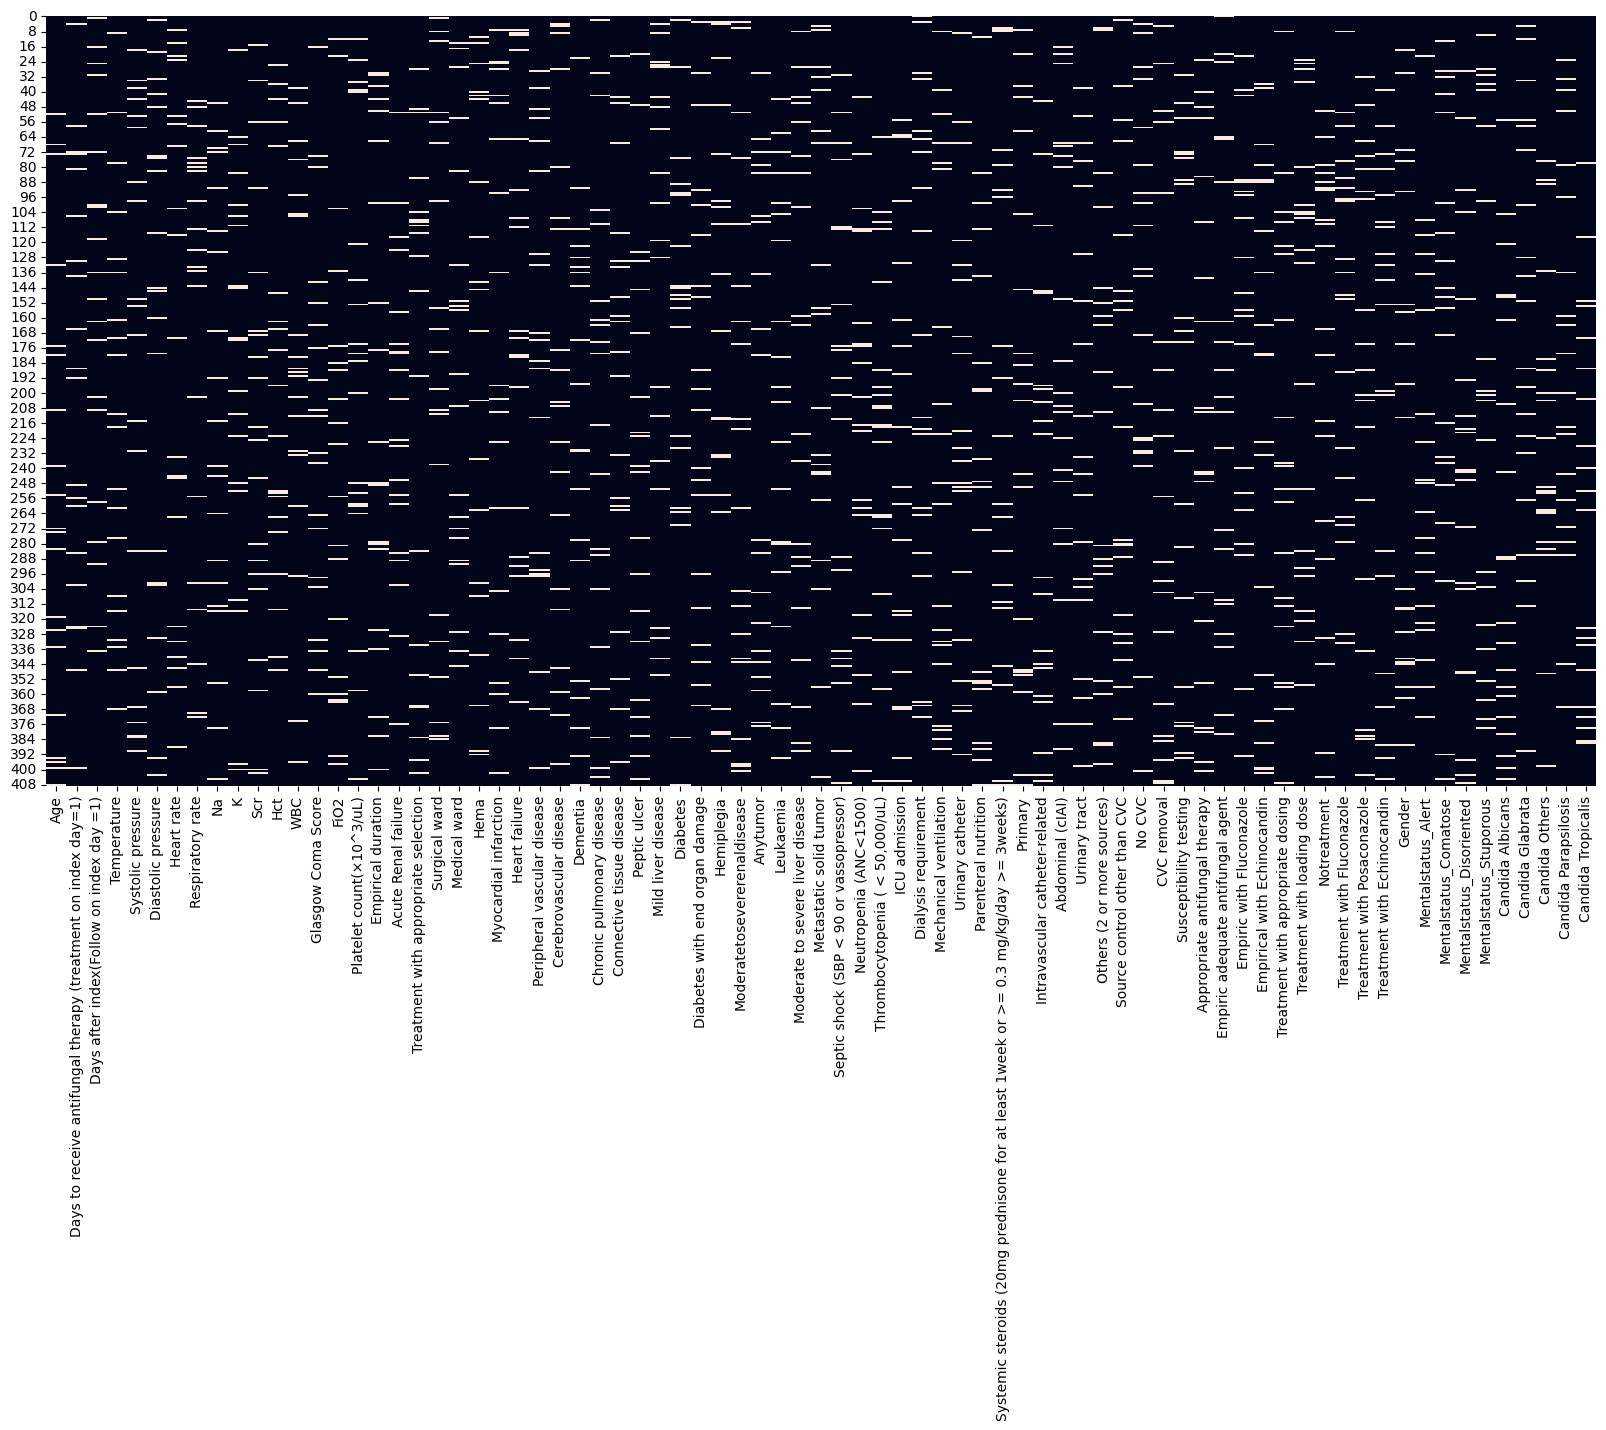

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.isna(),cbar=False)
#Nan looks like human input

## Analyse de fond

In [14]:
df_y.value_counts(normalize=True)

Deadin_D14
0             0.711491
1             0.288509
Name: proportion, dtype: float64

In [15]:
print(df.dtypes)
# Temporary replacement of NaN values with a unique value
cols_to_convert = [col for col in df.columns if df[col].dtype == 'float' and df[col].isin([0.0, 1.0, np.nan]).all()]

# Conversion of columns from float to boolean
for col in cols_to_convert:
    df[col] = df[col].apply(lambda x: np.nan if pd.isna(x) else bool(x))


# Display results
print("Columns detected and converted to booleans:", cols_to_convert)
print("\nTypes after conversion:")
print(df.dtypes)

Age                                                                                     float64
Days to receive antifungal therapy (treatment on index day=1)                           float64
Days after index(Follow on index day =1)                                                float64
Temperature                                                                             float64
Systolic pressure                                                                       float64
Diastolic pressure                                                                      float64
Heart rate                                                                              float64
Respiratory rate                                                                        float64
Na                                                                                      float64
K                                                                                       float64
Scr                                     

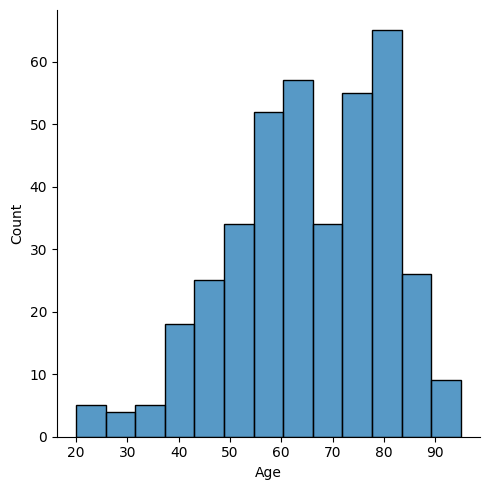

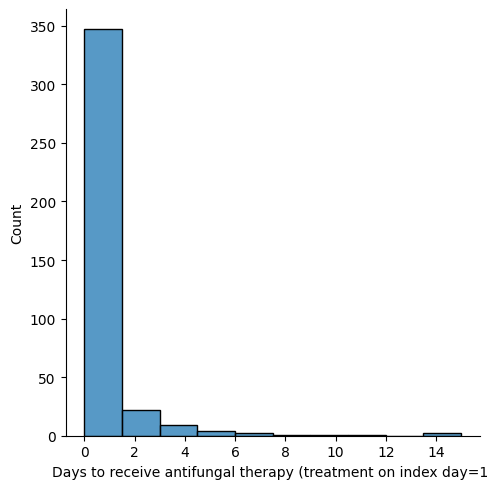

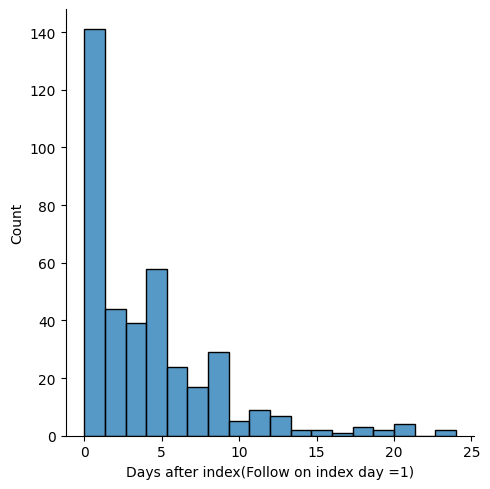

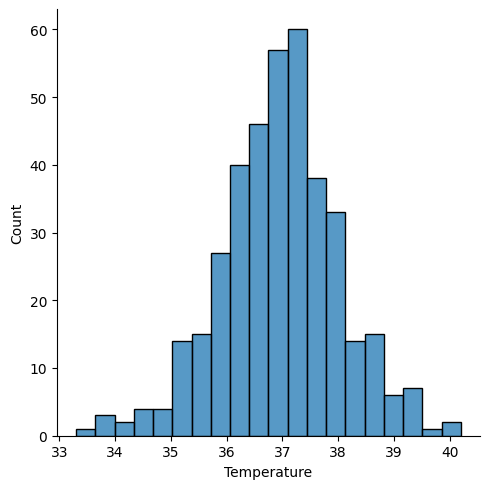

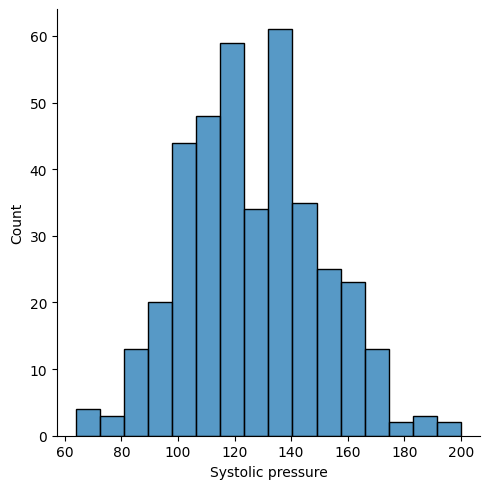

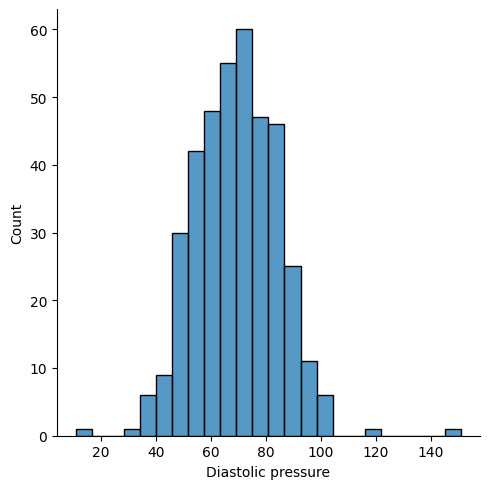

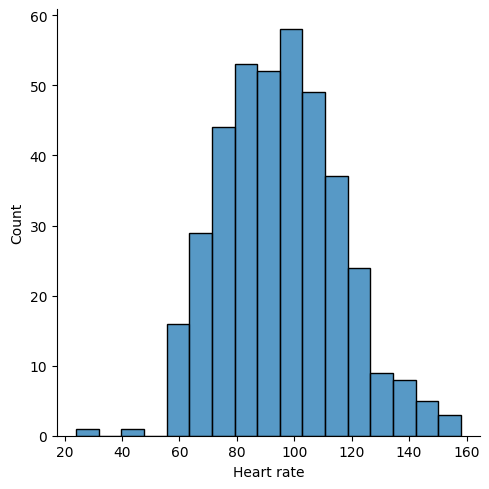

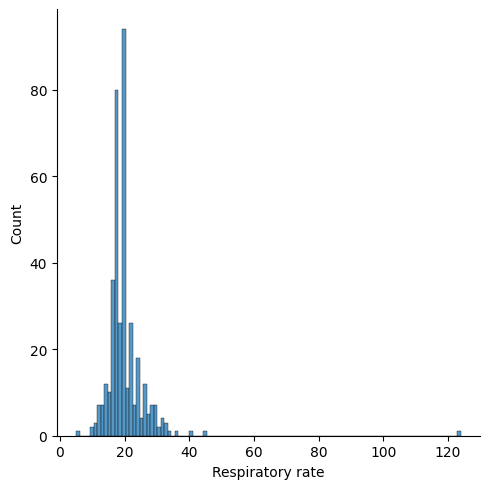

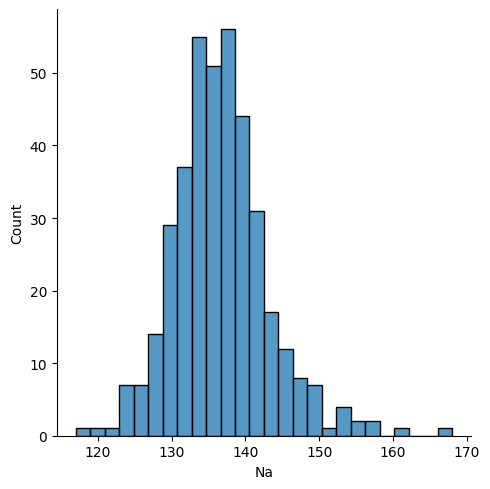

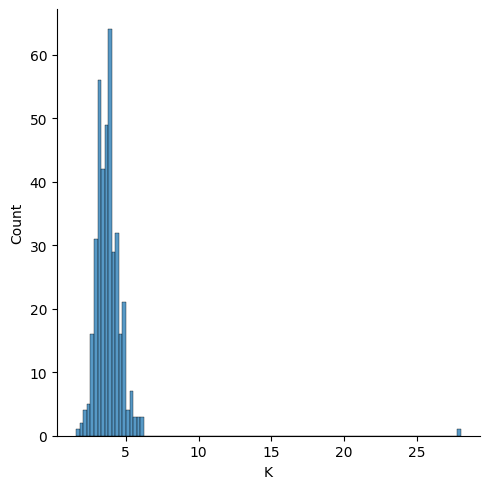

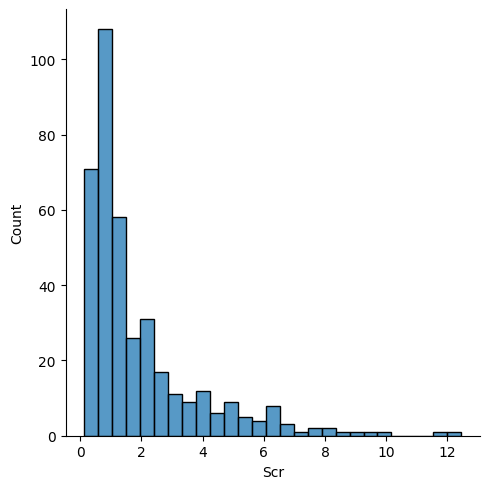

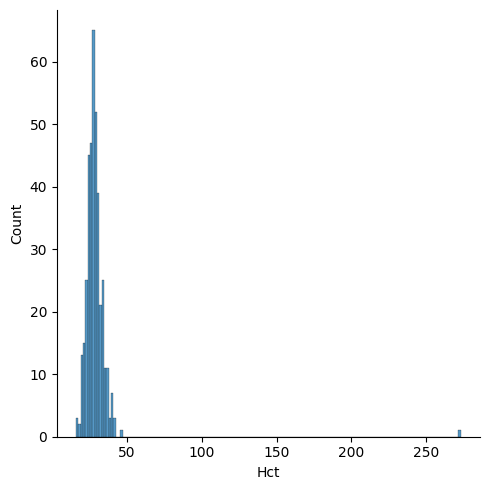

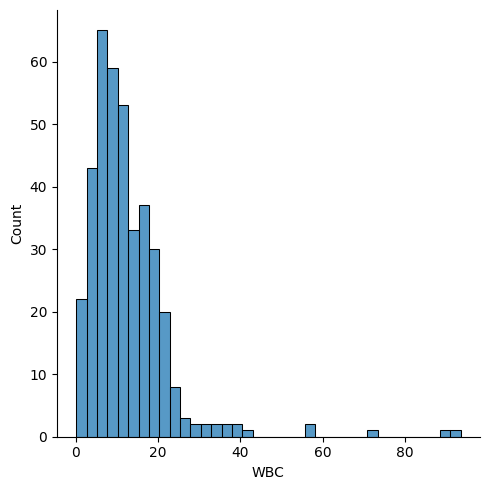

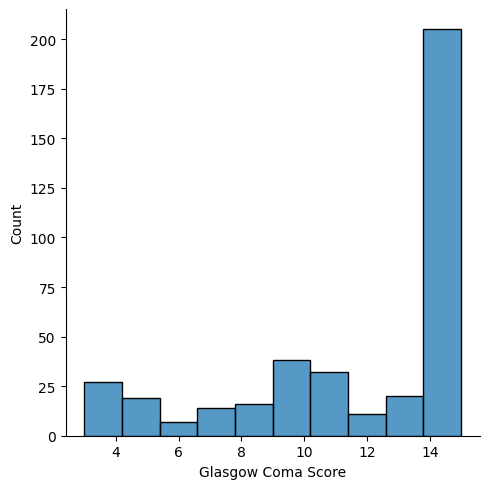

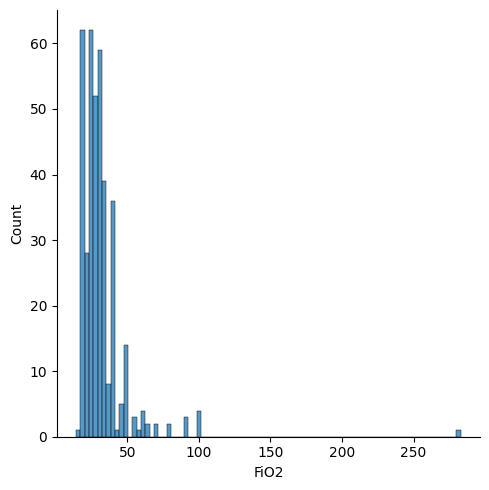

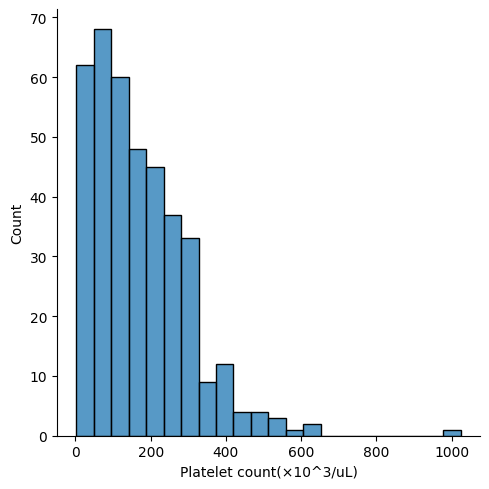

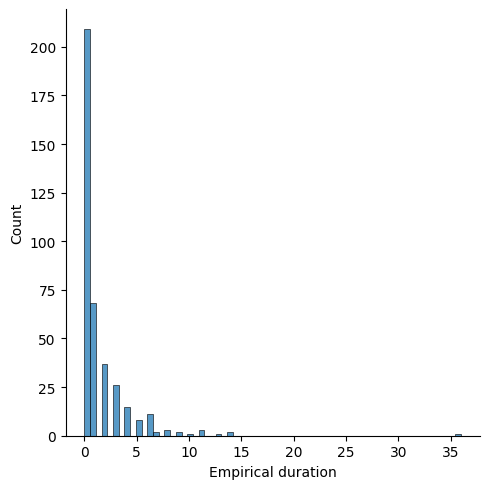

In [16]:
for col in df_copy.select_dtypes('float'):
  sns.displot(df_copy[col])

## Qualitatives Variables

In [17]:
for col in df.select_dtypes('object'):
  print(f'{col:-<100}{df[col].unique()}')

Acute Renal failure---------------------------------------------------------------------------------[False True nan]
Treatment with appropriate selection----------------------------------------------------------------[True False nan]
Surgical ward---------------------------------------------------------------------------------------[True nan False]
Medical ward----------------------------------------------------------------------------------------[False True nan]
Hema------------------------------------------------------------------------------------------------[False True nan]
Myocardial infarction-------------------------------------------------------------------------------[False True nan]
Heart failure---------------------------------------------------------------------------------------[False True nan]
Peripheral vascular disease-------------------------------------------------------------------------[False True nan]
Cerebrovascular disease-----------------------------------------

In [18]:
df['Treatment with Posaconazole'].value_counts()

Treatment with Posaconazole
False    388
True       1
Name: count, dtype: int64

<ipython-input-19-139331c47ffe>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


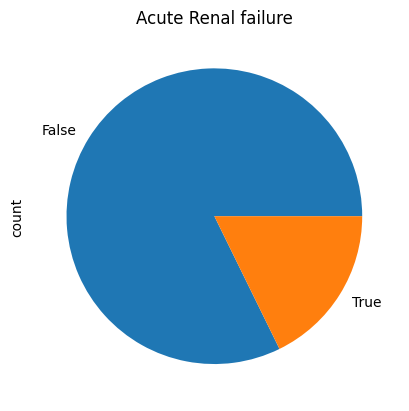

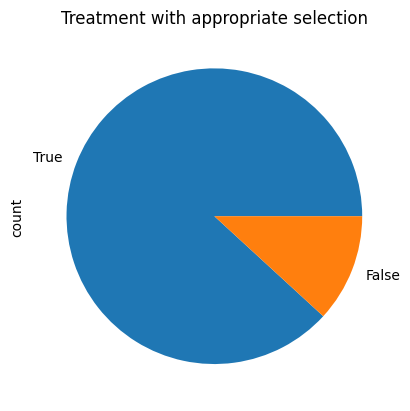

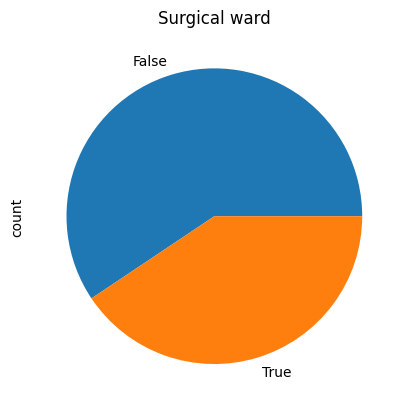

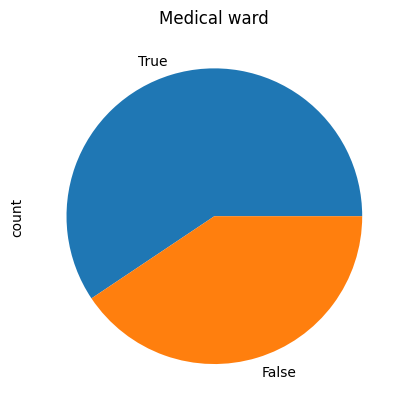

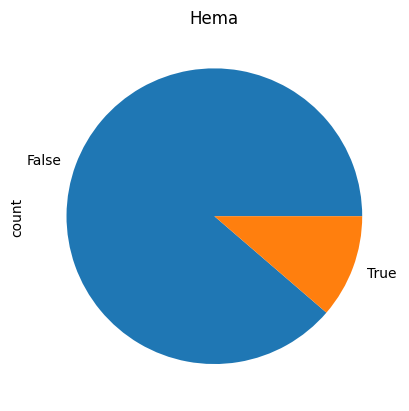

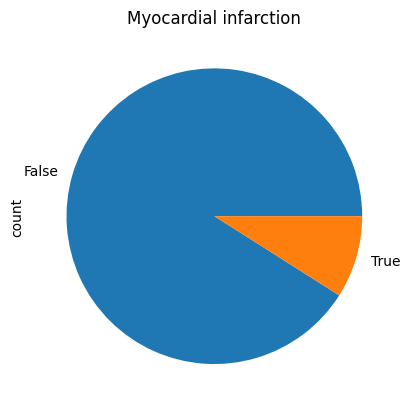

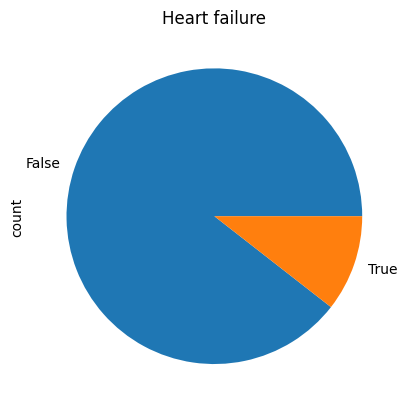

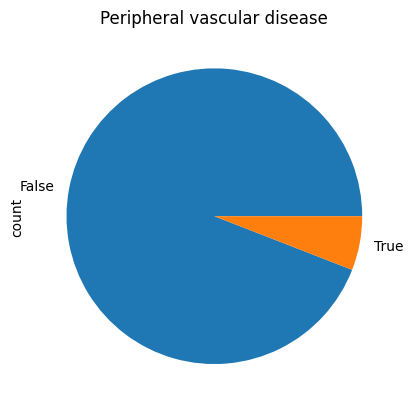

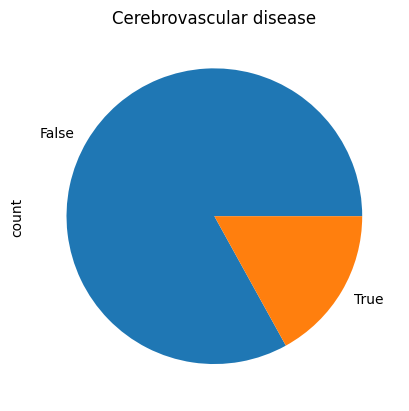

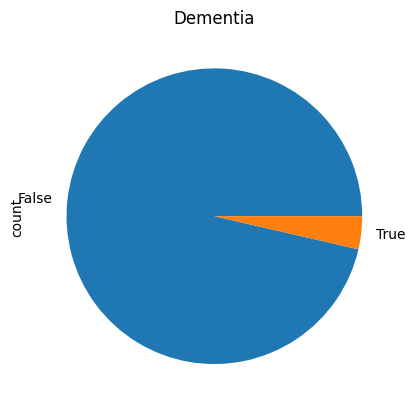

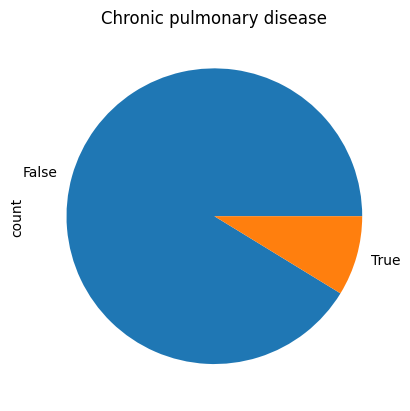

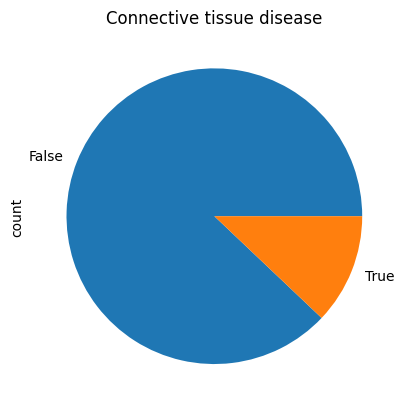

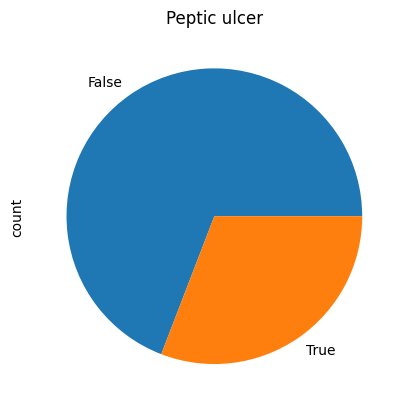

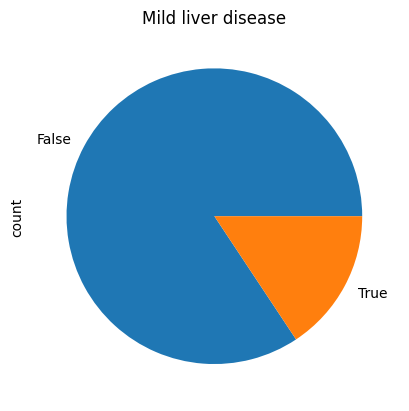

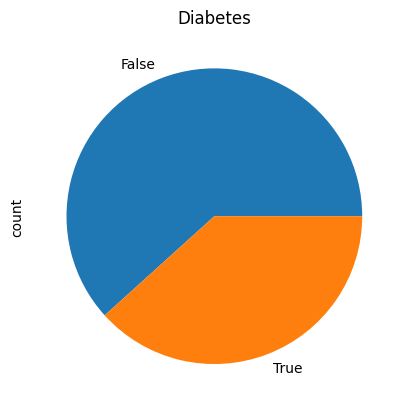

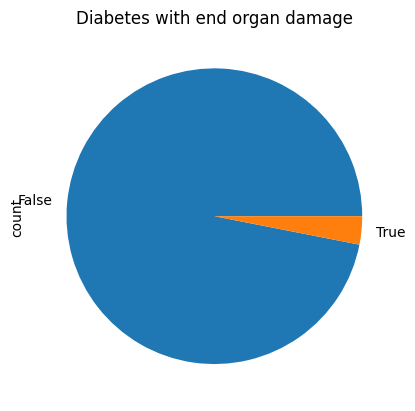

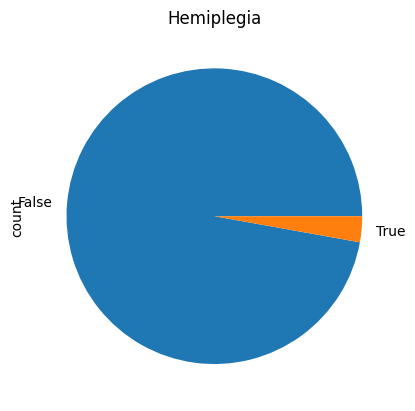

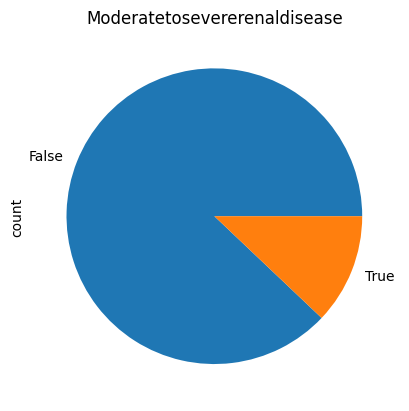

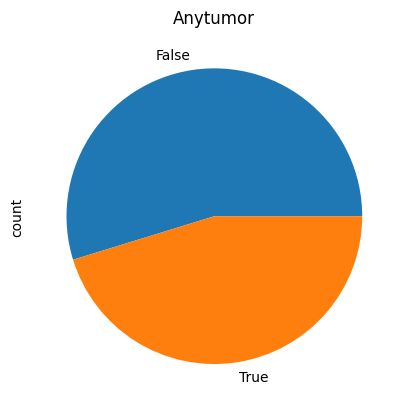

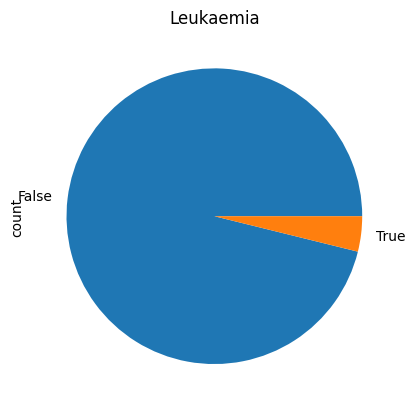

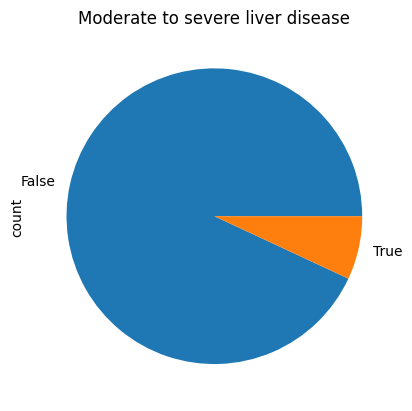

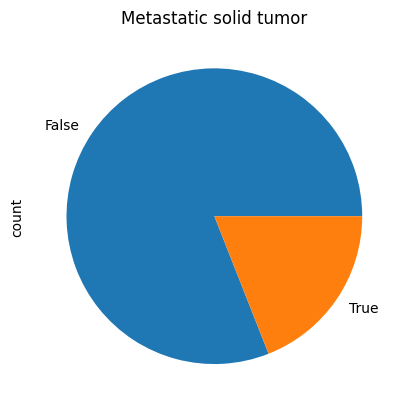

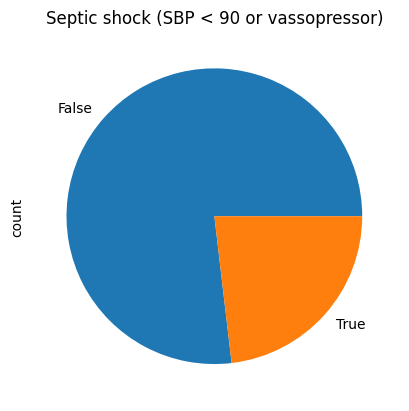

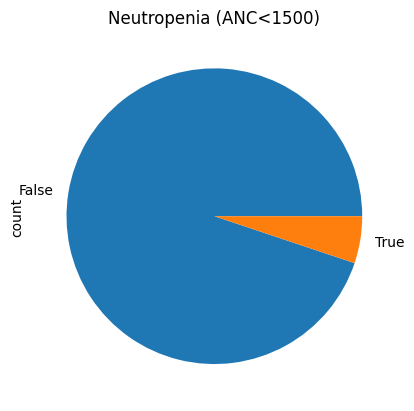

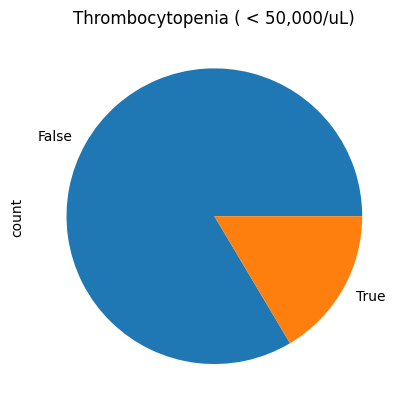

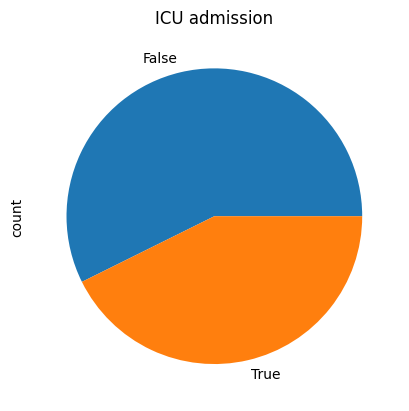

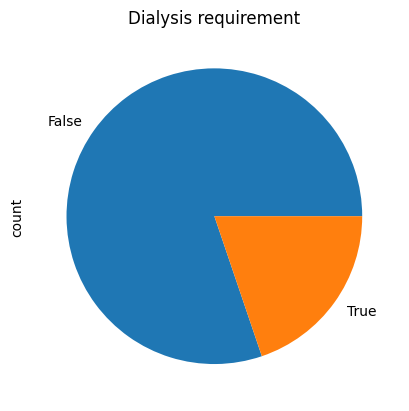

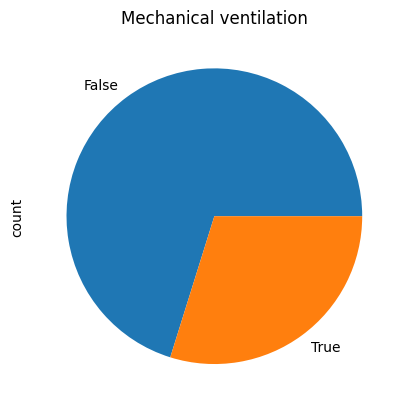

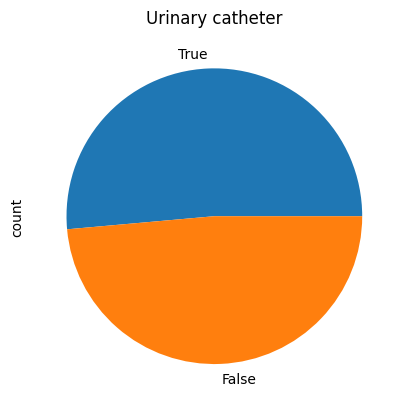

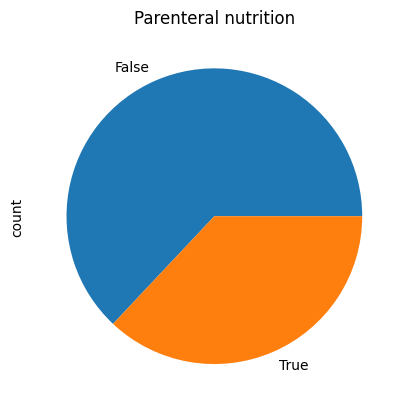

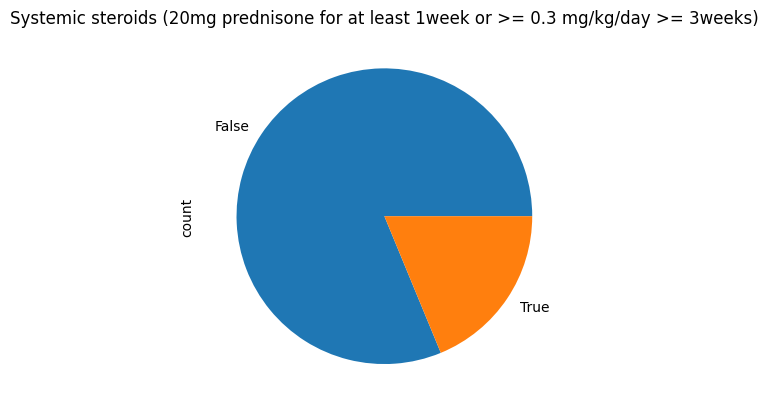

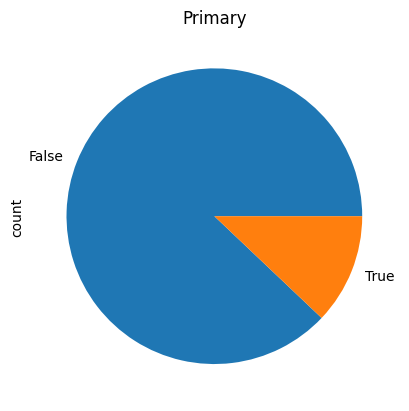

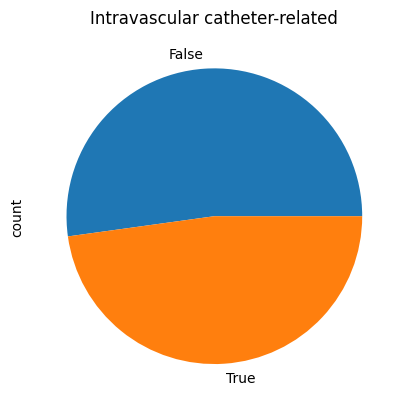

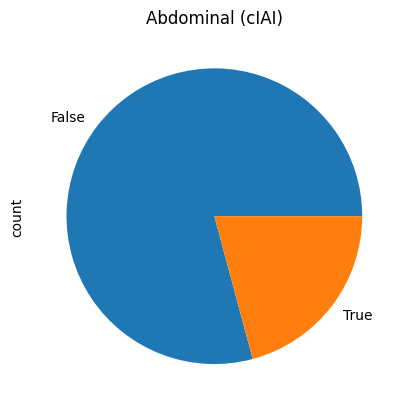

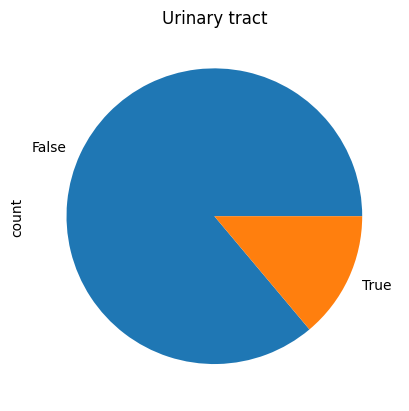

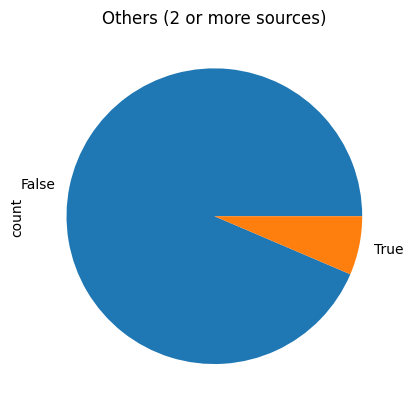

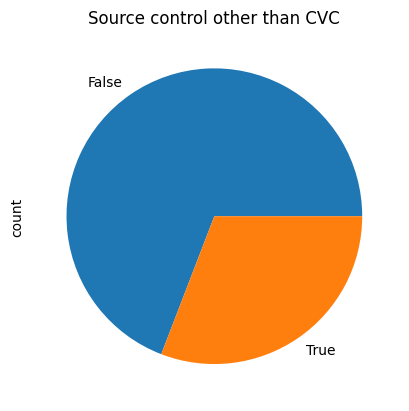

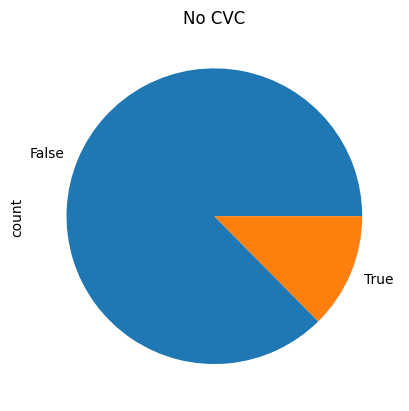

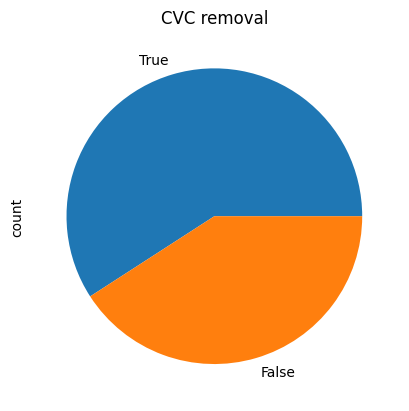

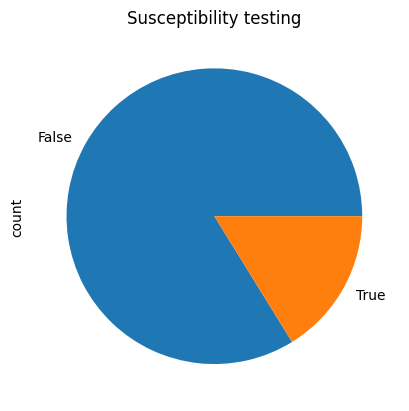

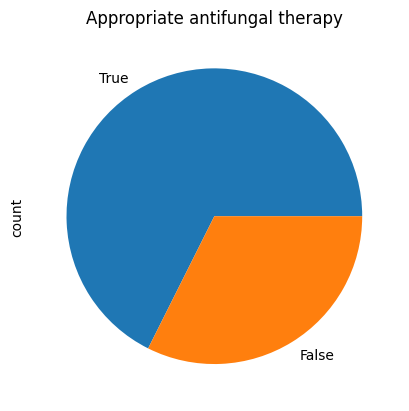

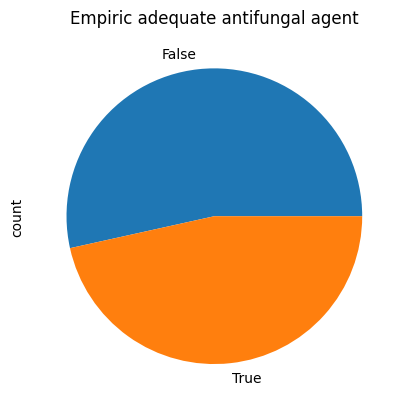

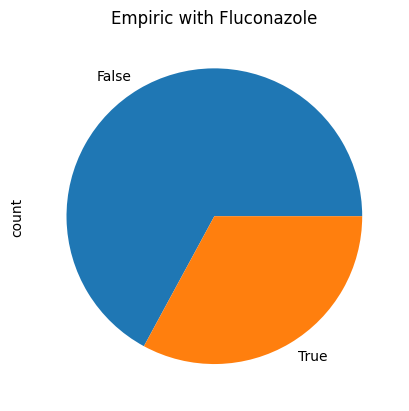

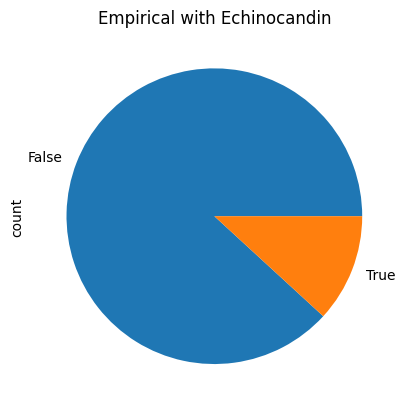

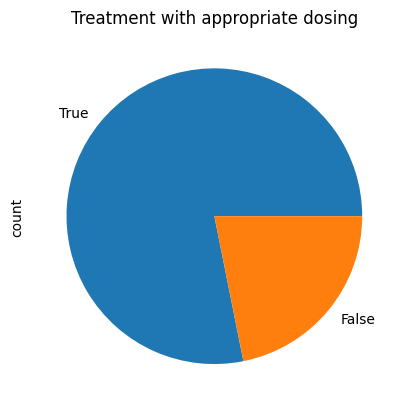

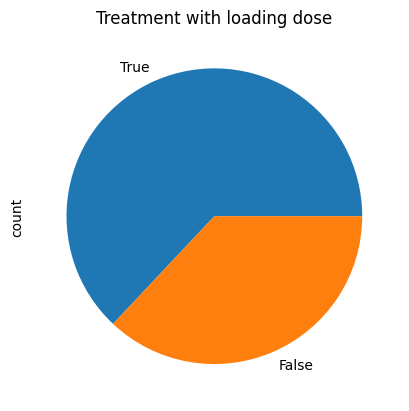

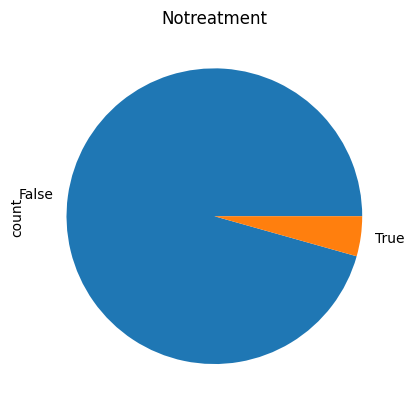

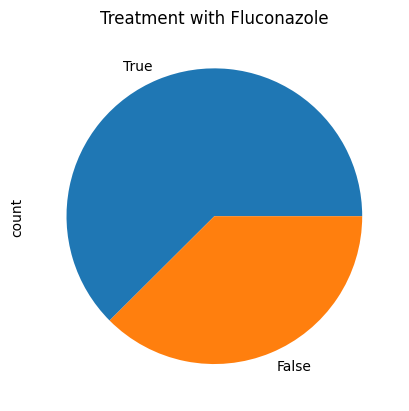

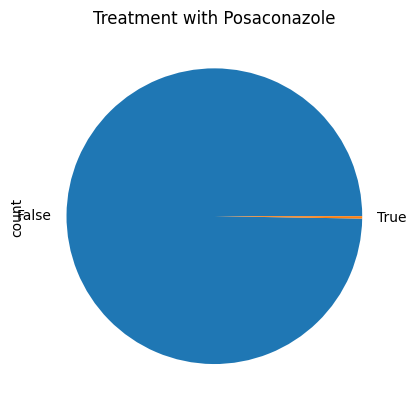

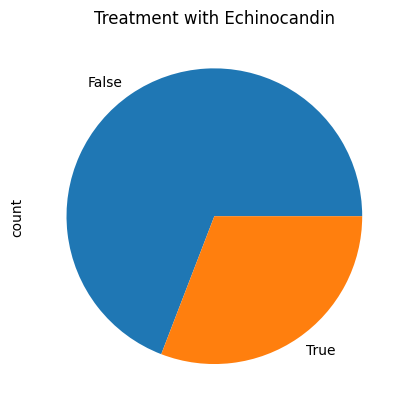

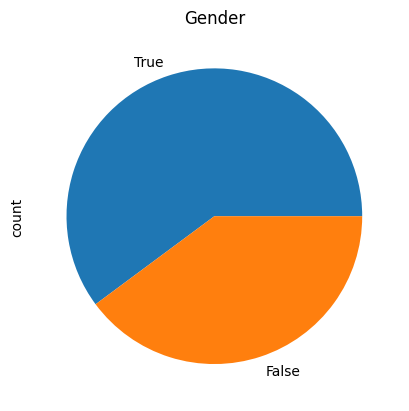

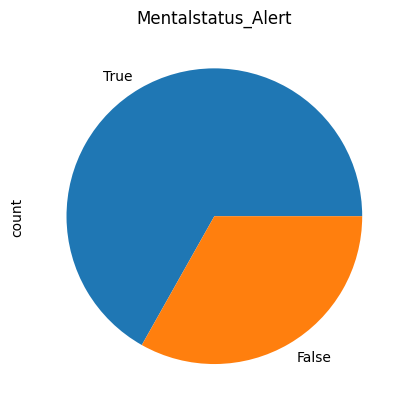

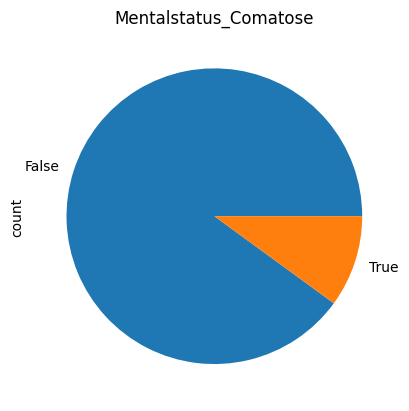

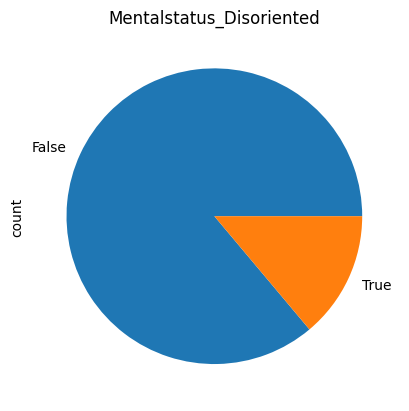

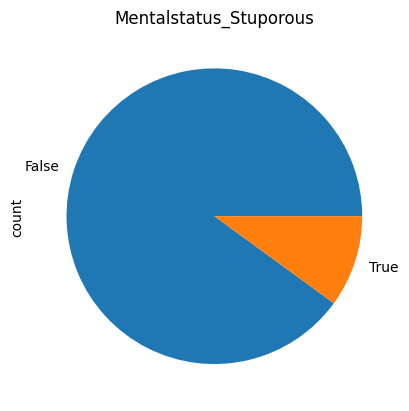

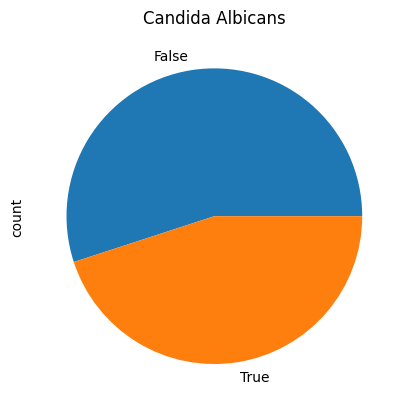

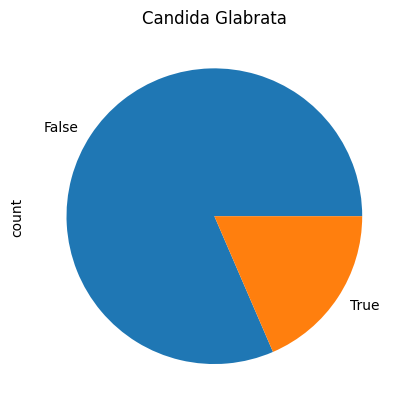

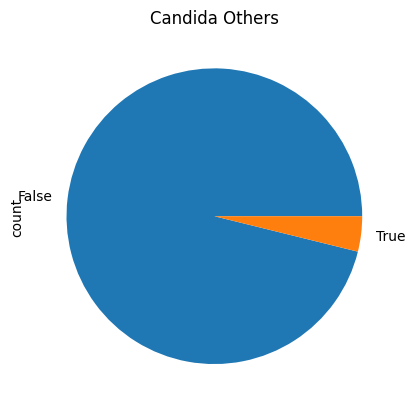

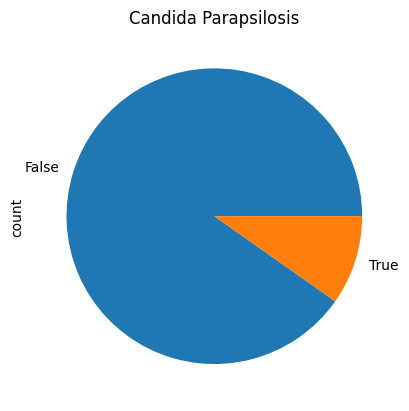

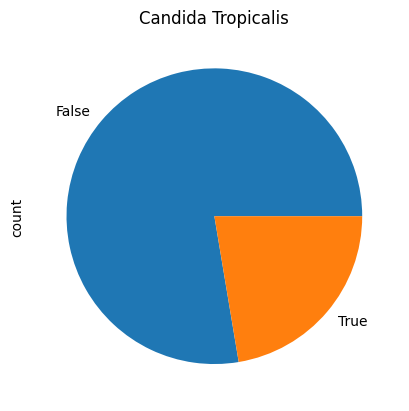

In [19]:
for col in df.select_dtypes('object'):
  plt.figure()
  plt.title(f'{col}')
  df[col].value_counts().plot.pie()

## Relation Target/Variables

In [20]:
new_df=pd.concat([df,df_y],axis=1)

In [21]:
new_df

Age  Days to receive antifungal therapy (treatment on index day=1)  \
0    82.0                                                1.0               
1    49.0                                                0.0               
2    44.0                                                1.0               
3    79.0                                                1.0               
4    51.0                                                NaN               
..    ...                                                ...               
404  68.0                                                1.0               
405  73.0                                                1.0               
406  75.0                                                1.0               
407  46.0                                                1.0               
408   NaN                                                0.0               

     Days after index(Follow on index day =1)  Temperature  Systolic pressure  \
0                                    2.000000         36.9              137.0   
1                                         NaN         37.3              139.0   
2                                    4.000000         39.3              121.0   
3                                    8.000000         35.4               97.0   
4                                    2.000000         36.8              148.0   
..                                        ...          ...                ...   
404                                  2.000000         34.6              117.0   
405                                  9.000000         36.6              100.0   
406                                  3.000000         36.1              156.0   
407                                  1.000000         37.6              200.0   
408                                  4.367574         38.2               95.0   

     Diastolic pressure  Heart rate  Respiratory rate          Na         K  \
0                  74.0        59.0              18.0  142.000000  3.900000   
1                 100.0        74.0              18.0  132.000000  3.500000   
2                   NaN       153.0              33.0  137.000000  4.400000   
3                  82.0        69.0               5.0  144.000000  4.200000   
4                  80.0       100.0              18.0  134.000000  4.700000   
..                  ...         ...               ...         ...       ...   
404                56.0       104.0              30.0  133.000000  5.700000   
405                50.0        80.0              11.0         NaN  4.400000   
406                94.0        87.0              20.0  136.949812  3.798853   
407                79.0        69.0              23.0  147.000000  5.100000   
408                59.0        74.0              17.0  134.000000  3.700000   

      Scr   Hct    WBC  Glasgow Coma Score       FiO2  \
0    1.41  31.8  10.75                14.0  20.000000   
1    1.18  31.0   2.17                15.0  20.023407   
2    6.64  23.1  18.94                 9.0  40.000000   
3    1.44  27.8  32.48                 4.0  30.000000   
4    0.20  22.7   1.86                15.0  24.693323   
..    ...   ...    ...                 ...        ...   
404  2.26  19.5  11.67                 6.0  50.000000   
405  4.03  26.7  15.43                11.0  30.000000   
406  0.69  32.5   5.88                15.0  26.783452   
407  1.60  22.7   0.15                11.0  60.000000   
408  1.67  32.3   9.02                15.0  25.593308   

     Platelet count(×10^3/uL)  Empirical duration Acute Renal failure  \
0                       244.0                 0.0               False   
1                        83.0                 0.0               False   
2                       312.0                 1.0                True   
3                        58.0                 2.0                True   
4                        62.0                13.0               False   
..                        ...                 ..

In [22]:
quantitave=df.select_dtypes('object')
qualitative=df.select_dtypes('float')

In [23]:
quantitave

Acute Renal failure Treatment with appropriate selection Surgical ward  \
0                 False                                 True          True   
1                 False                                False           NaN   
2                  True                                 True         False   
3                  True                                 True         False   
4                 False                                False         False   
..                  ...                                  ...           ...   
404                True                                 True         False   
405               False                                 True         False   
406               False                                 True          True   
407                True                                 True         False   
408               False                                False          True   

    Medical ward   Hema Myocardial infarction Heart failure  \
0          False  False                 False         False   
1          False  False                 False         False   
2           True  False                 False         False   
3           True  False                 False         False   
4           True   True                 False          True   
..           ...    ...                   ...           ...   
404         True  False                 False         False   
405         True  False                  True         False   
406        False  False                 False         False   
407         True   True                 False         False   
408        False  False                 False         False   

    Peripheral vascular disease Cerebrovascular disease Dementia  \
0                         False                   False    False   
1                         False                   False    False   
2                         False                   False    False   
3                         False                    True    False   
4                         False                     NaN    False   
..                          ...                     ...      ...   
404                       False                    True    False   
405                        True                    True    False   
406                       False                   False    False   
407                       False                   False    False   
408                       False                   False      NaN   

    Chronic pulmonary disease Connective tissue disease Peptic ulcer  \
0                       False                     False         True   
1                       False                     False        False   
2                         NaN                      True        False   
3                        True                     False        False   
4                       False                     False        False   
..                        ...                       ...          ...   
404                       NaN                      True        False   
405                     False                     False          NaN   
406                     False                     False        False   
407                     False                     False        False   
408                     False                     False        False   

    Mild liver disease Diabetes Diabetes with end organ damage Hemiplegia  \
0                False    False                          False      False   
1                 True    False                          False      False   
2                False      NaN                          False      False   
3                False     True                            NaN        NaN   
4                  NaN     True                          False        NaN   
..                 ...      ...                            ...        ...   
404              False    False                          False      False   
405         

In [24]:
positive_df=new_df[new_df['Deadin_D14']==1]
negative_df=new_df[new_df['Deadin_D14']==0]

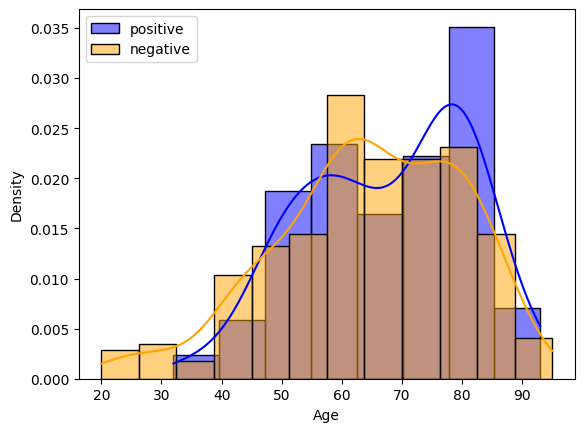

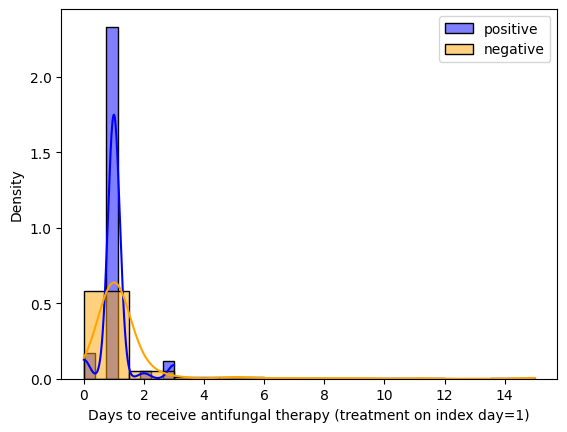

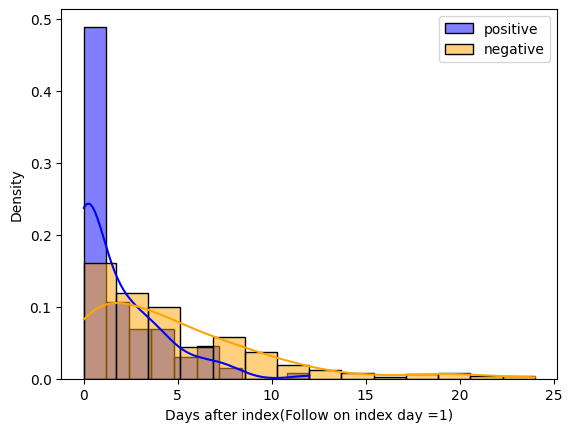

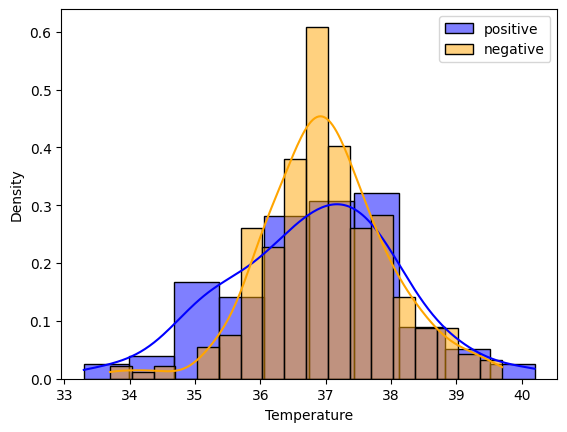

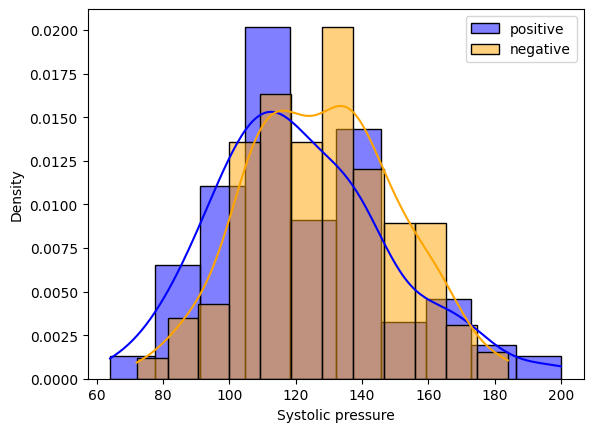

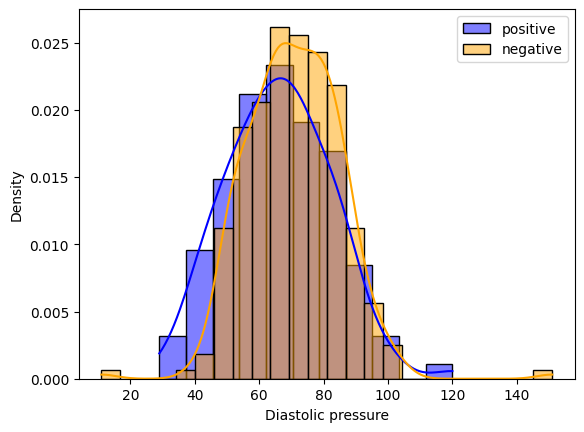

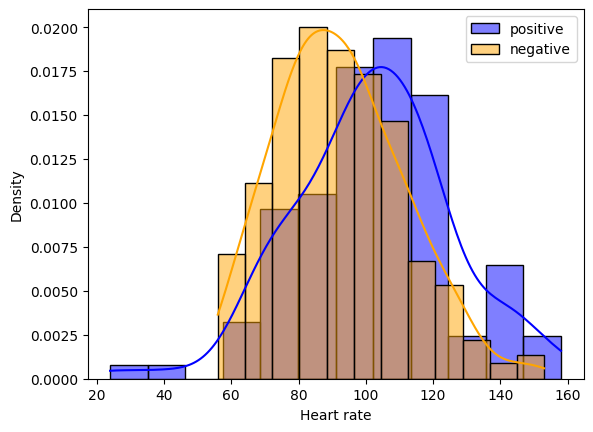

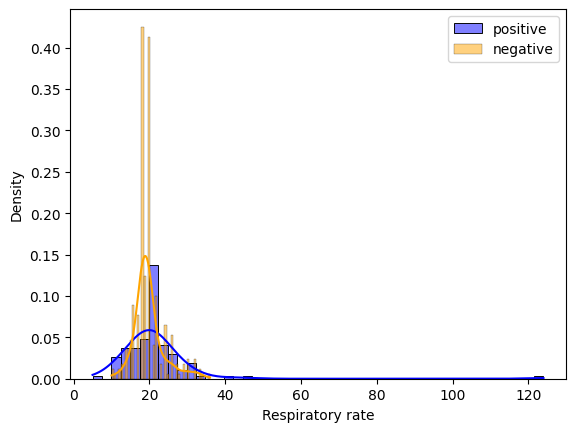

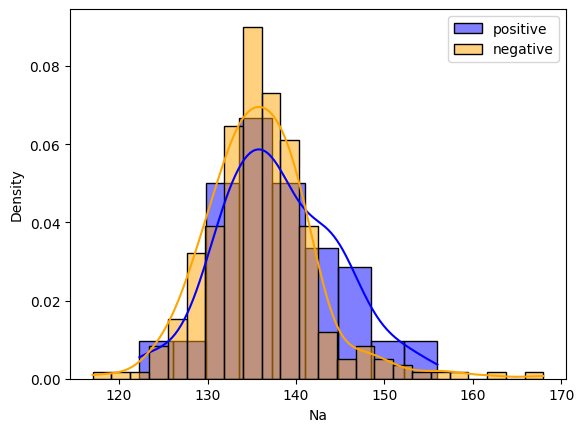

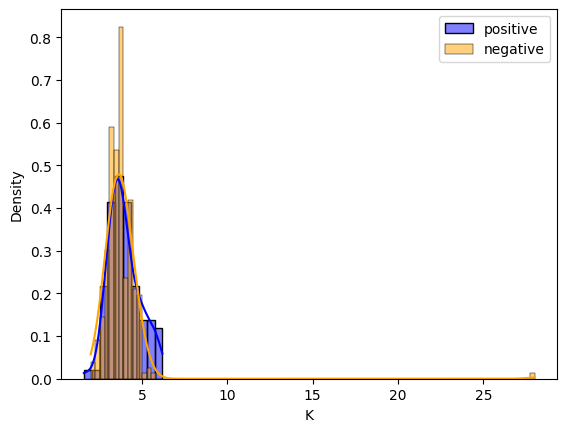

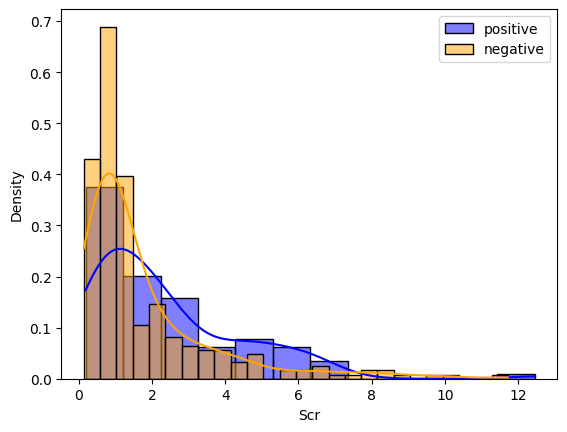

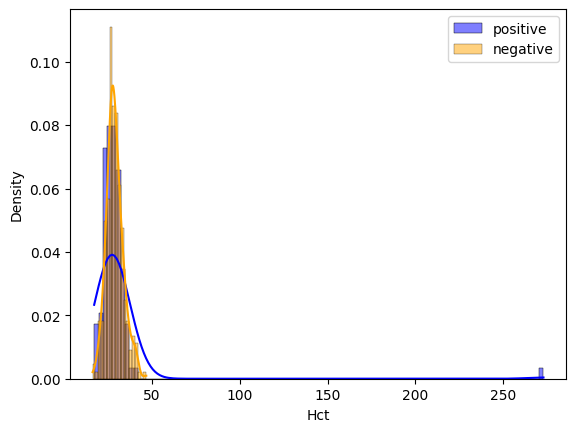

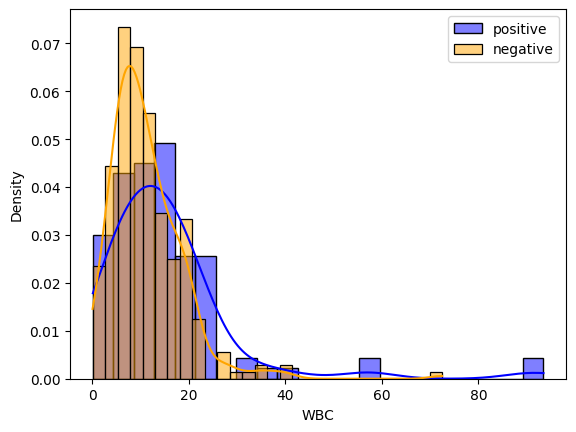

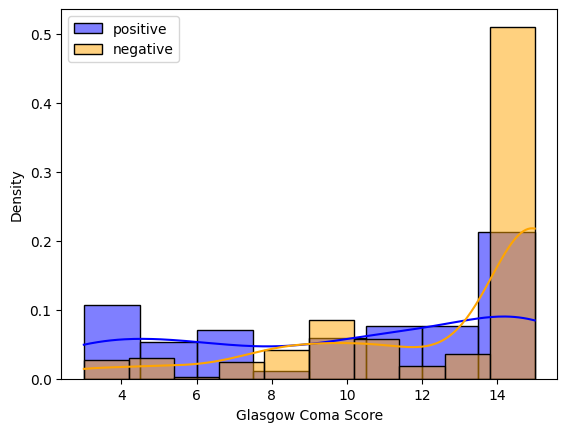

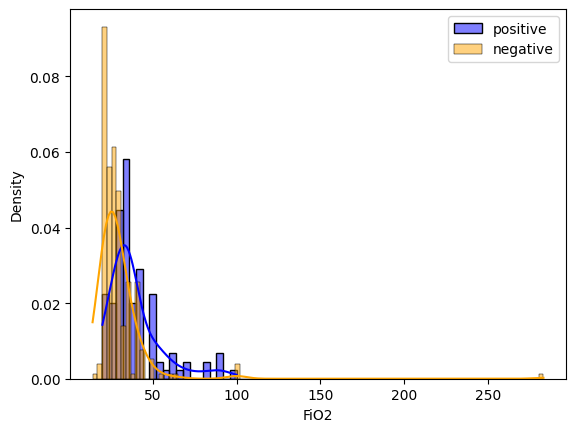

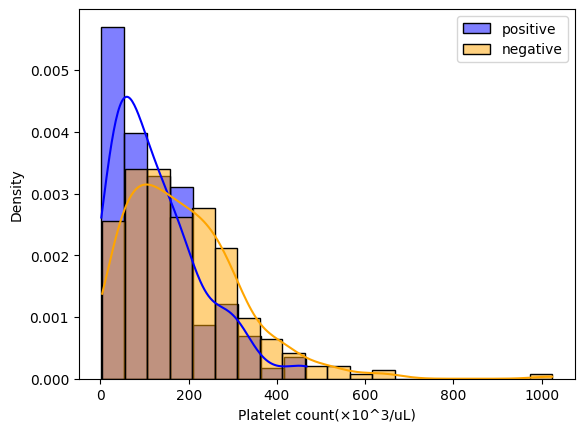

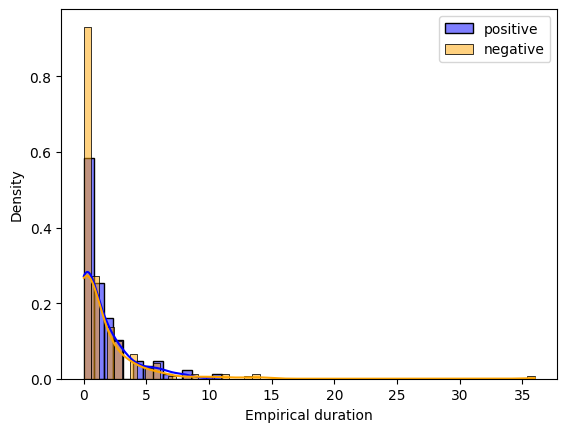

In [25]:
for col in qualitative:
  plt.figure()
  sns.histplot(positive_df[col], kde=True, color='blue', label='positive', stat="density", common_norm=False)
  sns.histplot(negative_df[col], kde=True, color='orange', label='negative', stat="density", common_norm=False)
  plt.legend()

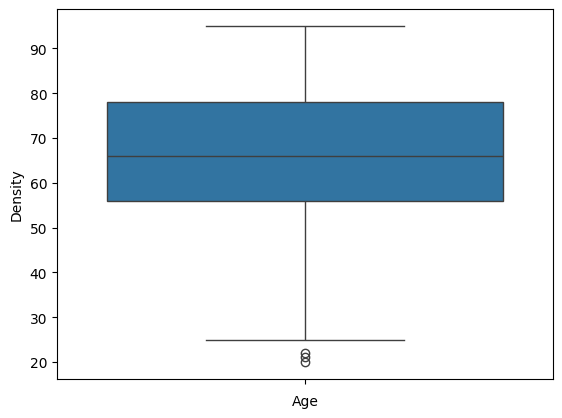

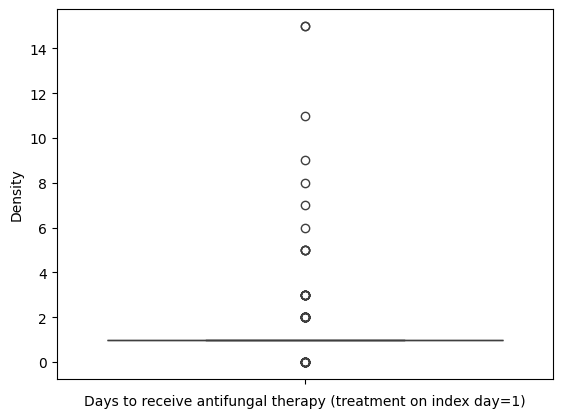

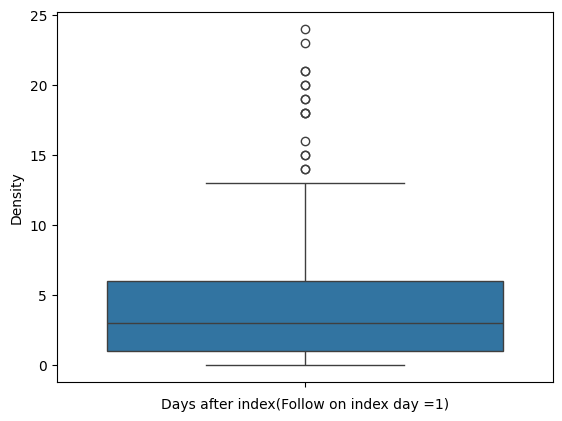

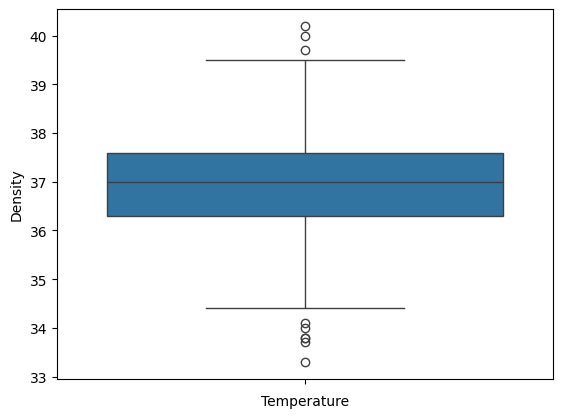

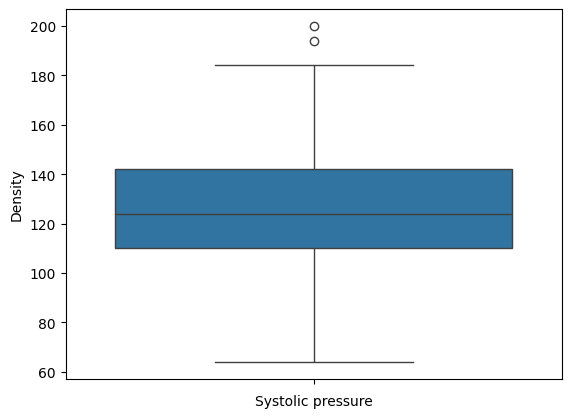

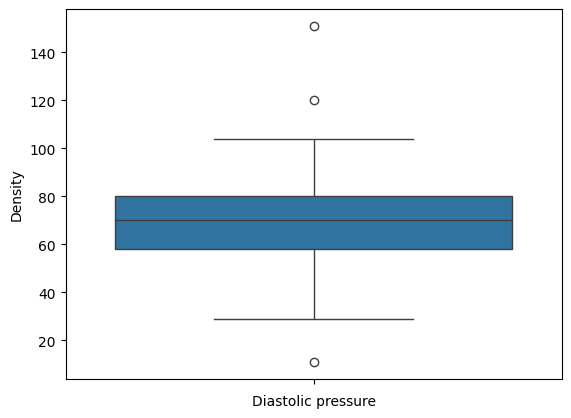

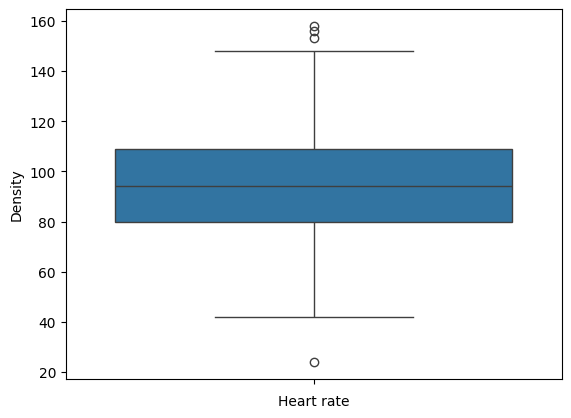

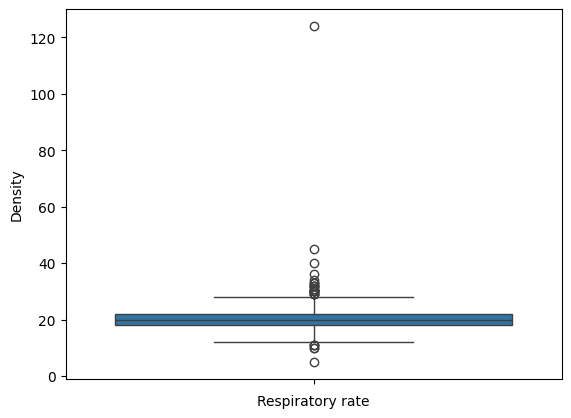

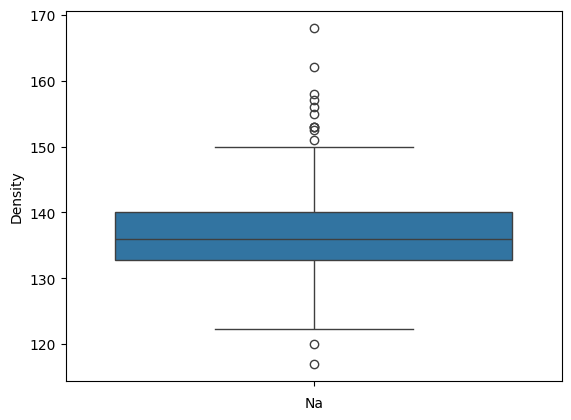

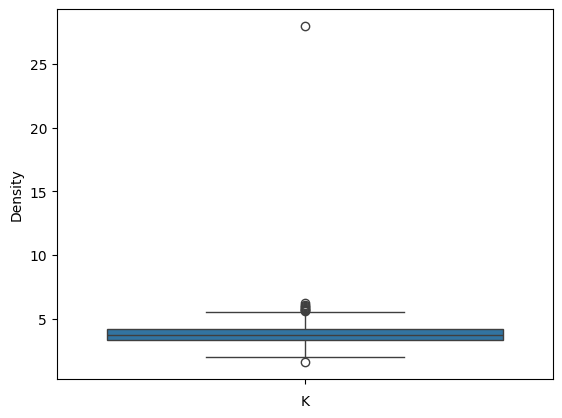

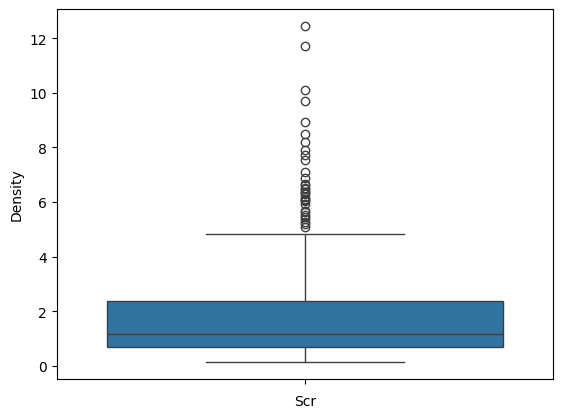

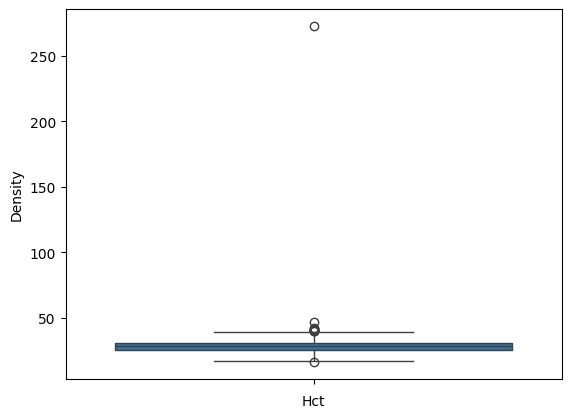

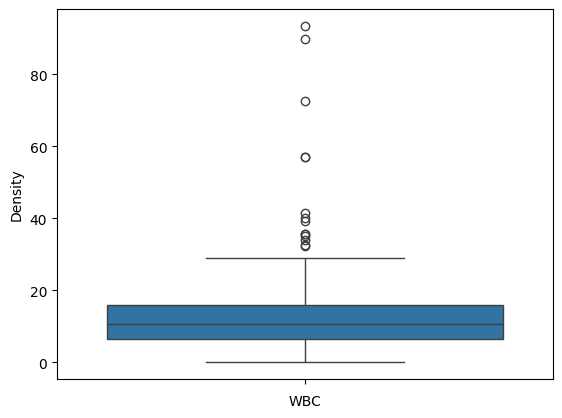

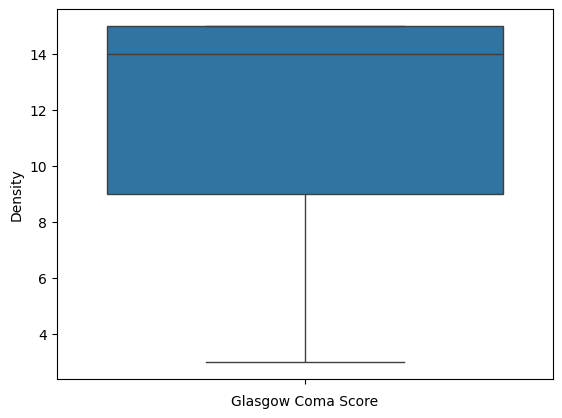

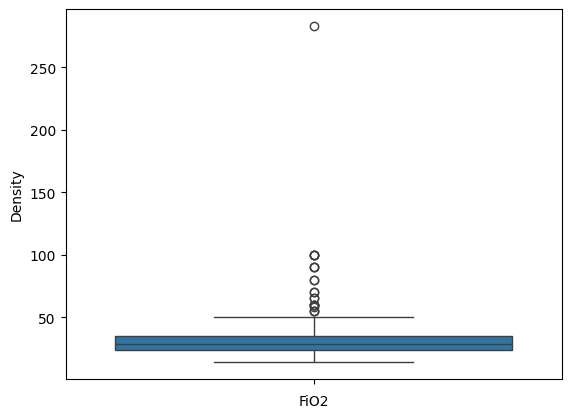

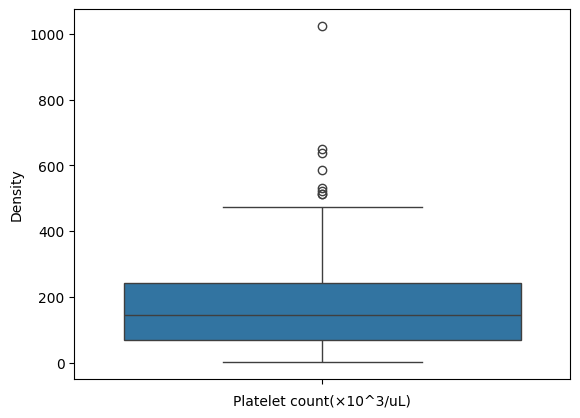

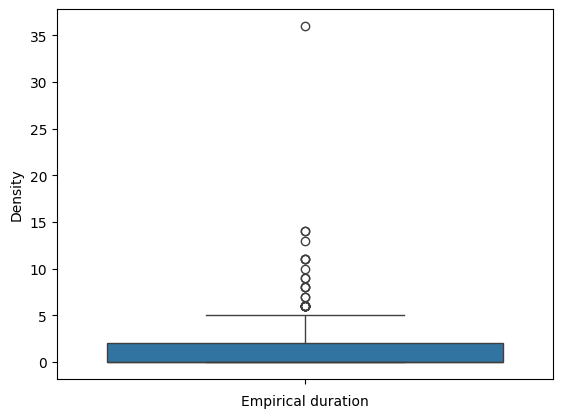

In [26]:
for col in qualitative:
  plt.figure()
  sns.boxplot(data=df_copy[col])
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.show()

<ipython-input-27-3fd2375de6af>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


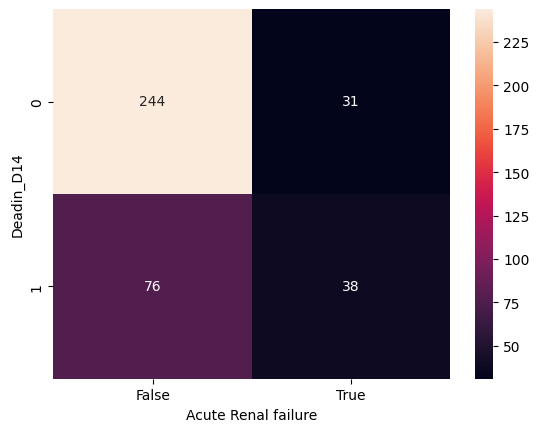

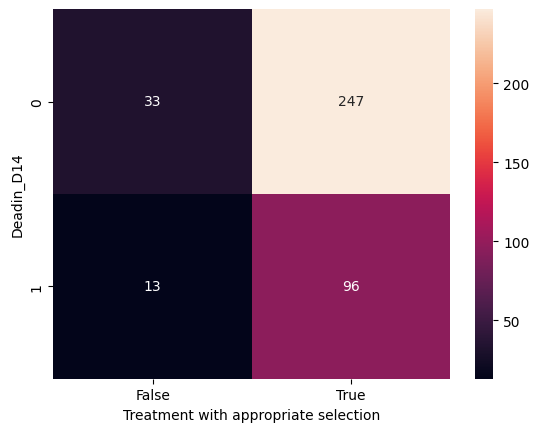

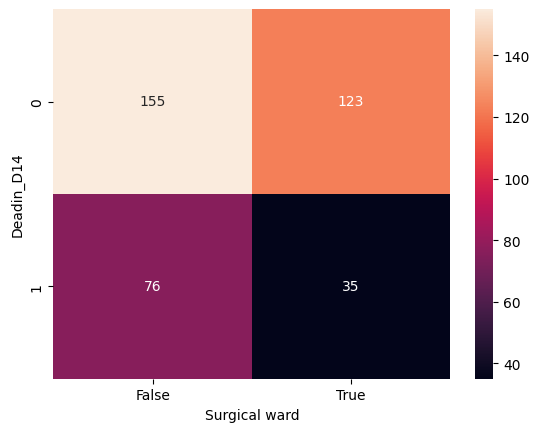

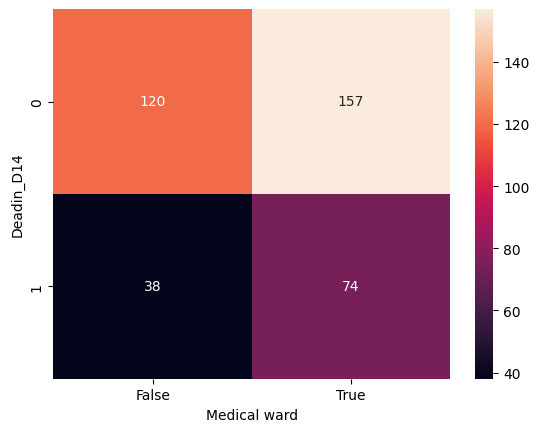

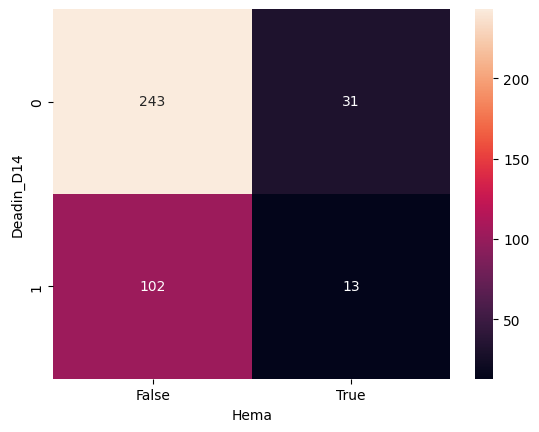

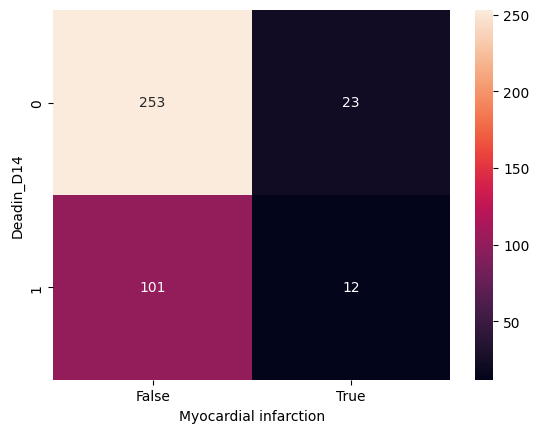

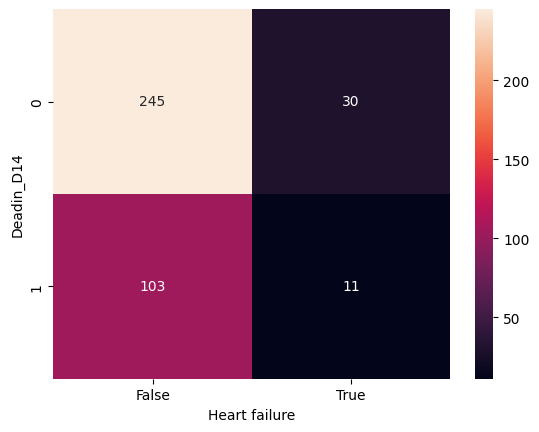

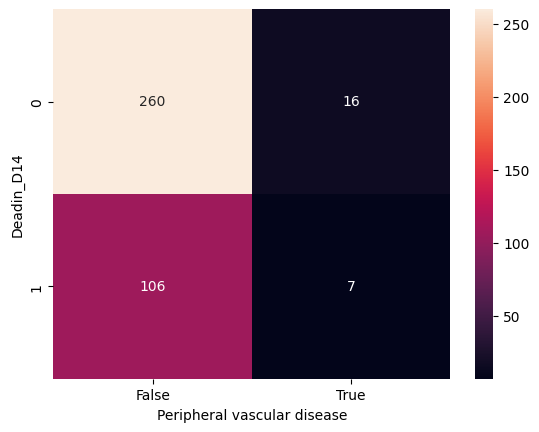

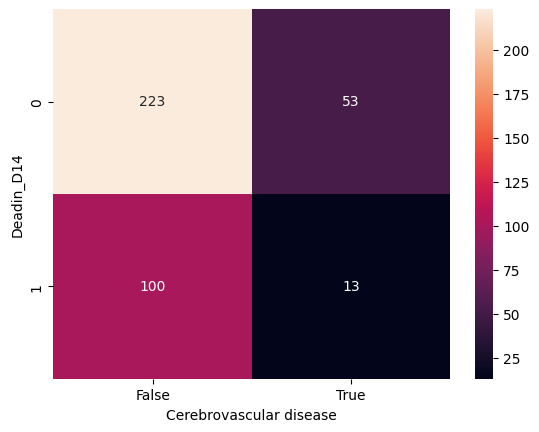

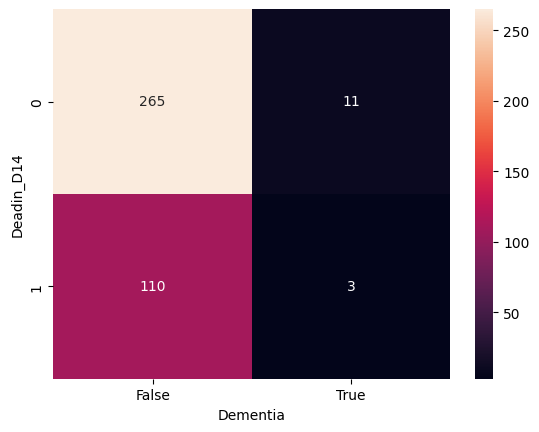

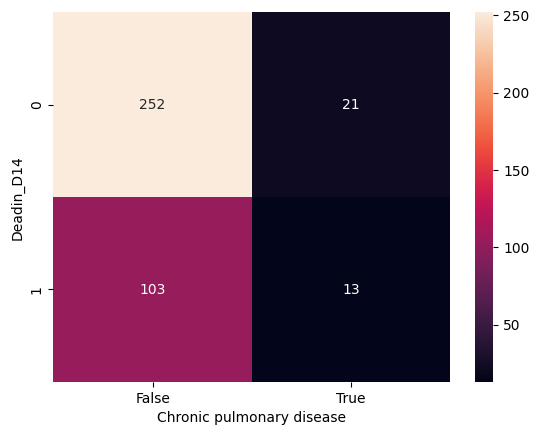

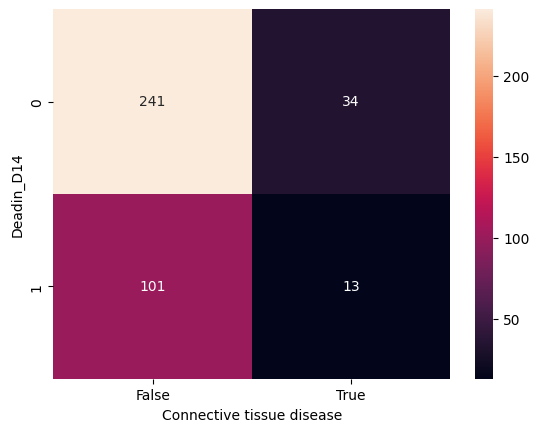

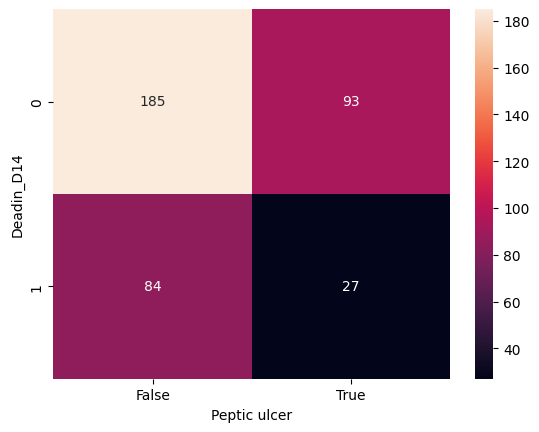

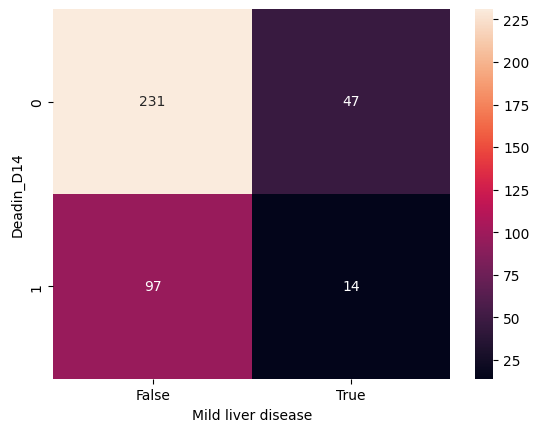

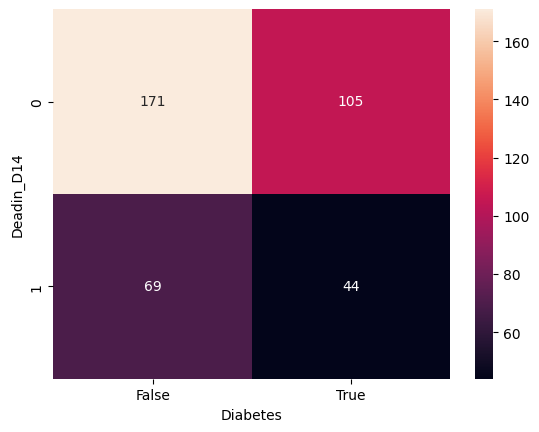

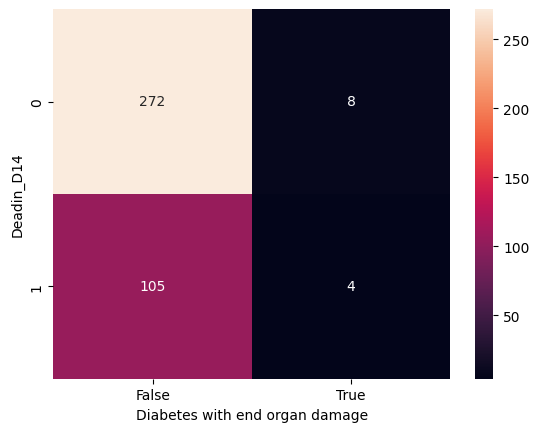

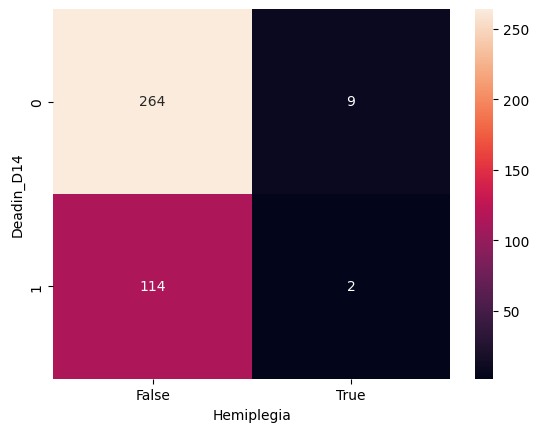

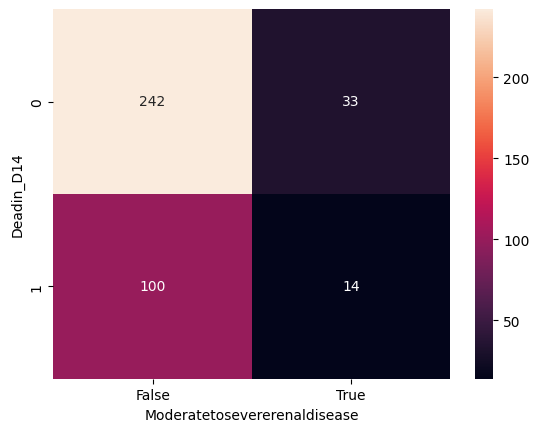

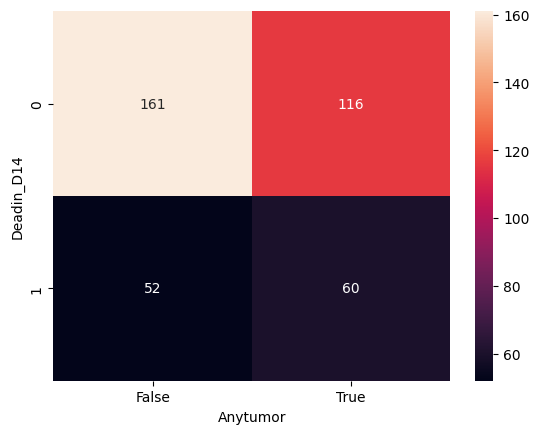

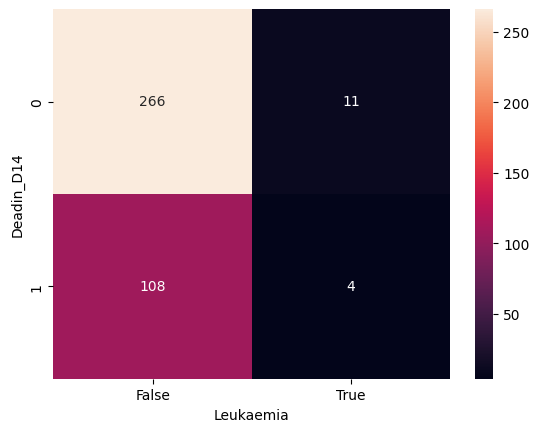

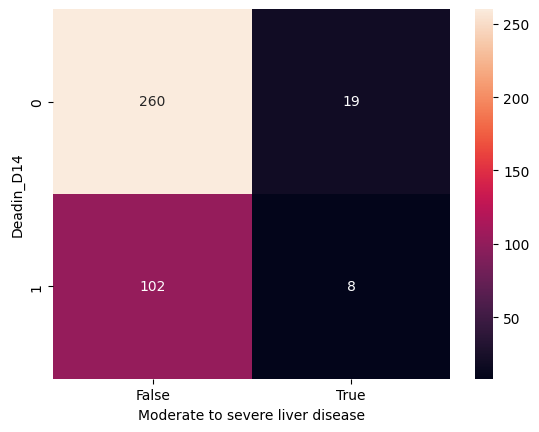

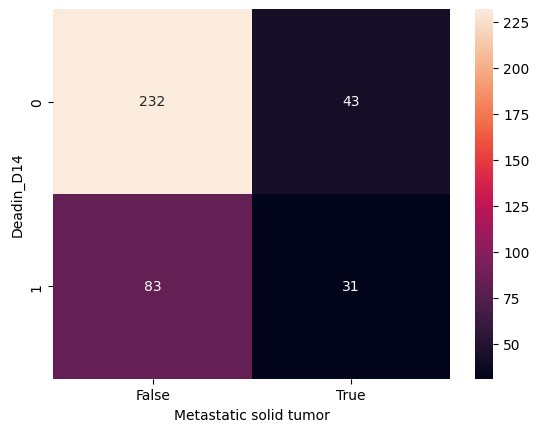

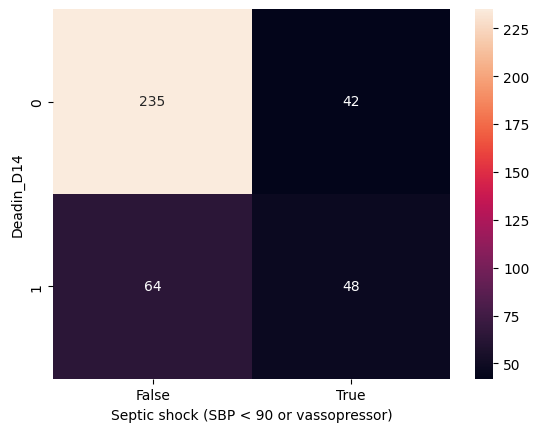

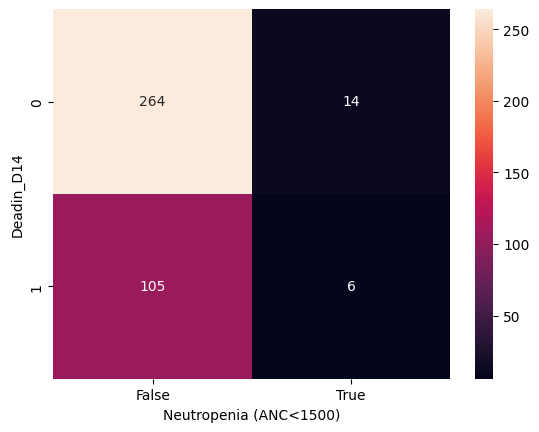

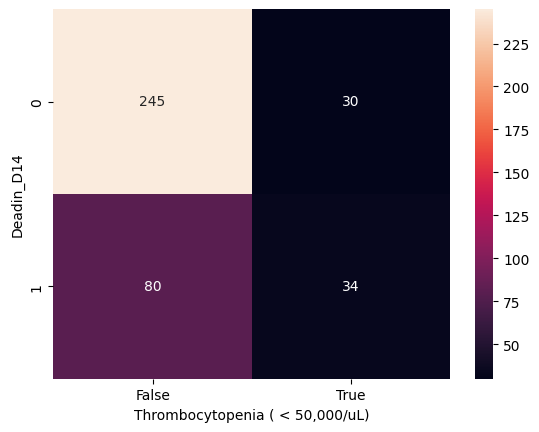

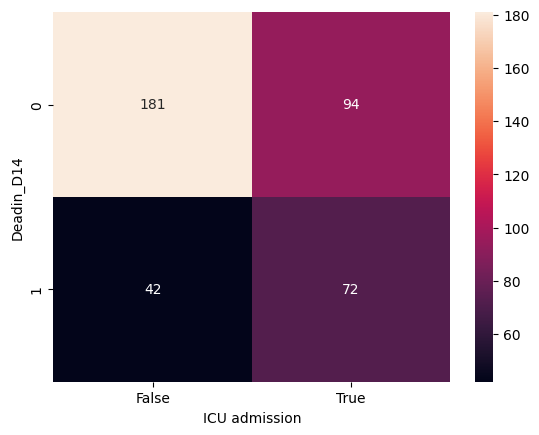

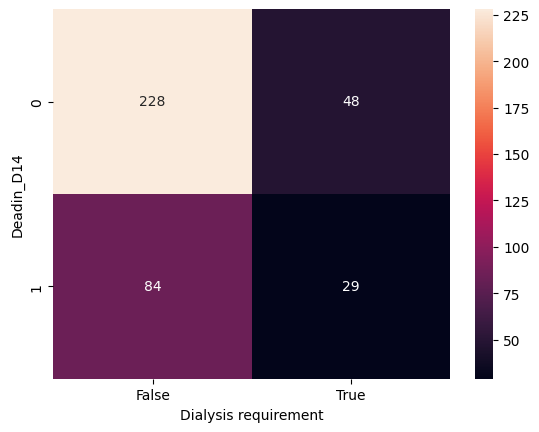

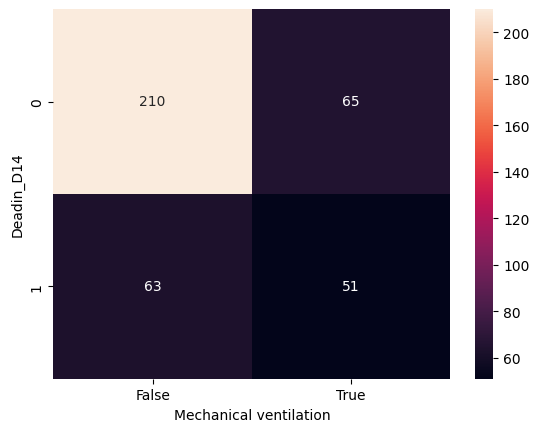

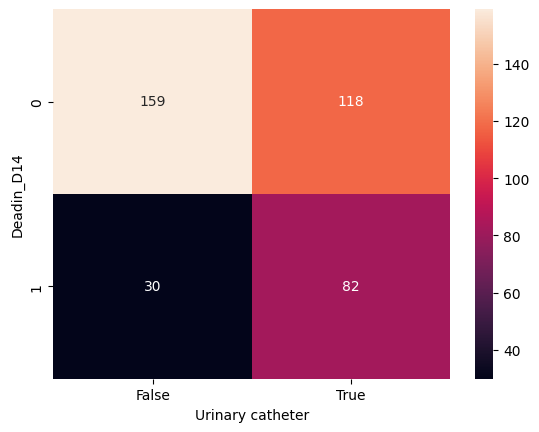

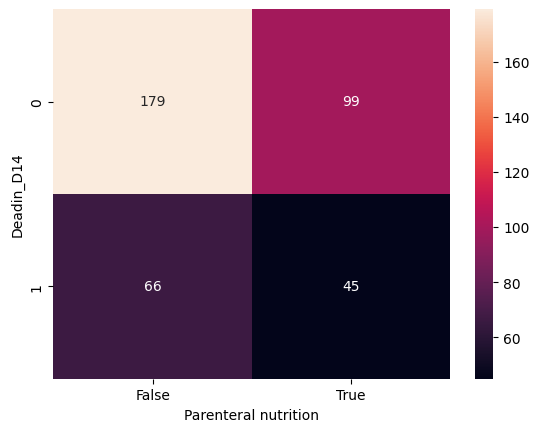

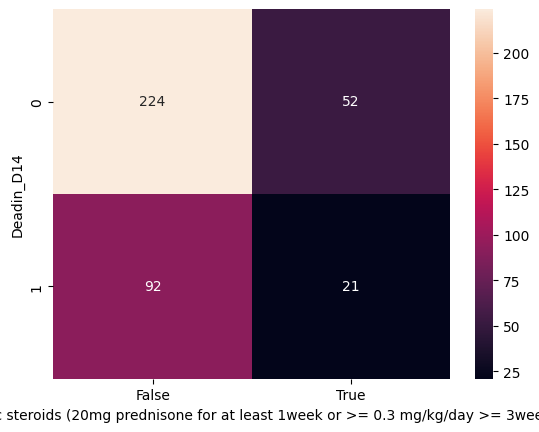

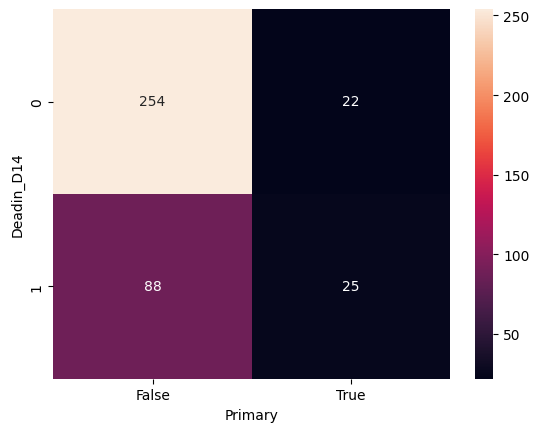

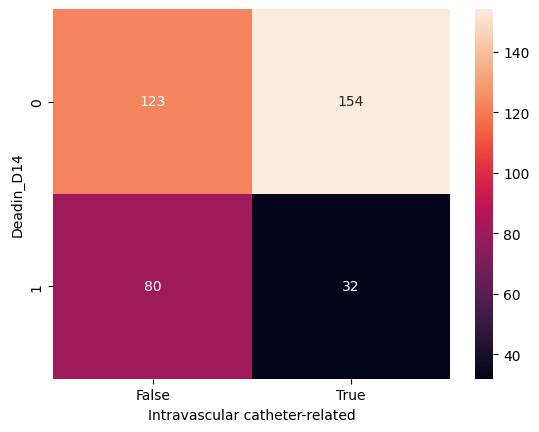

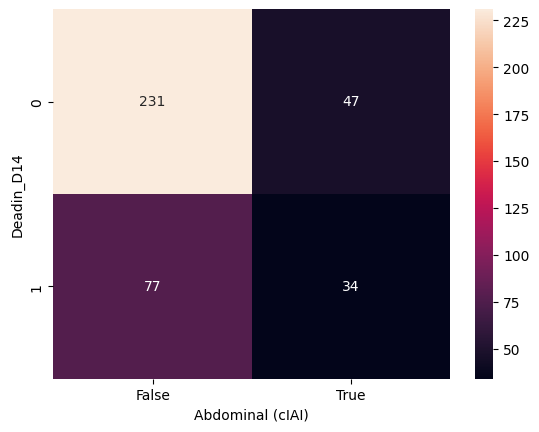

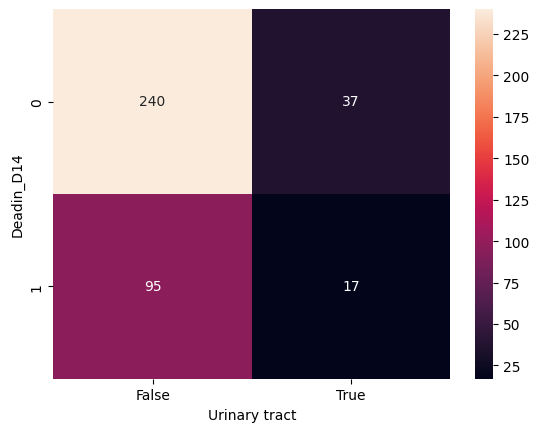

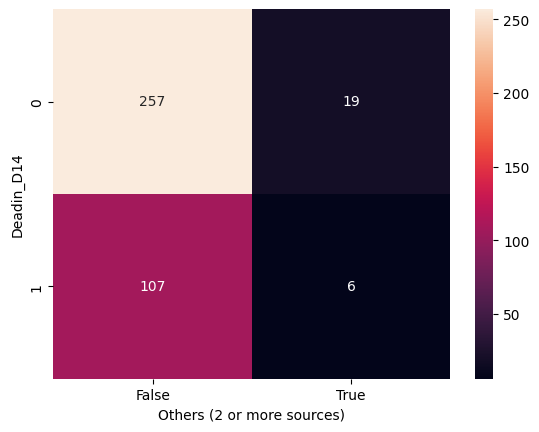

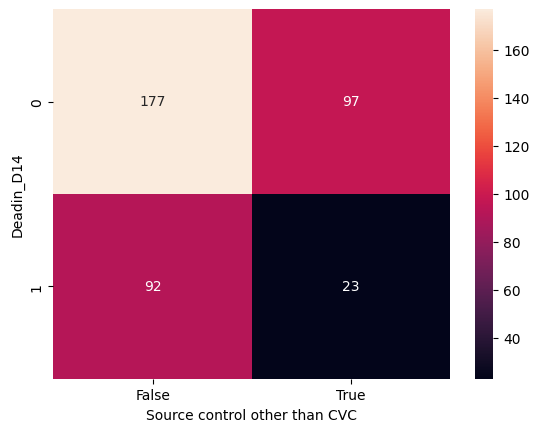

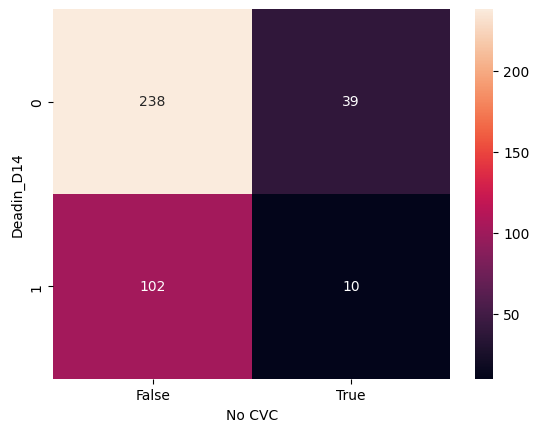

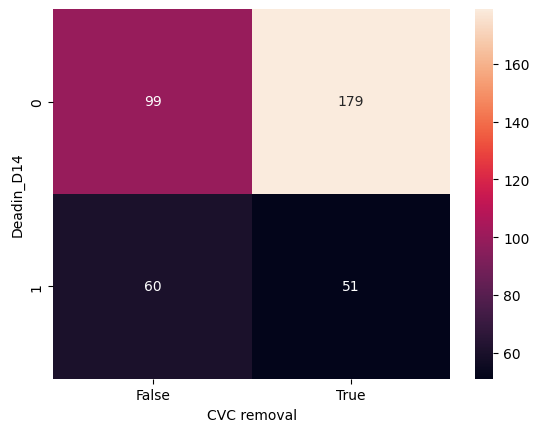

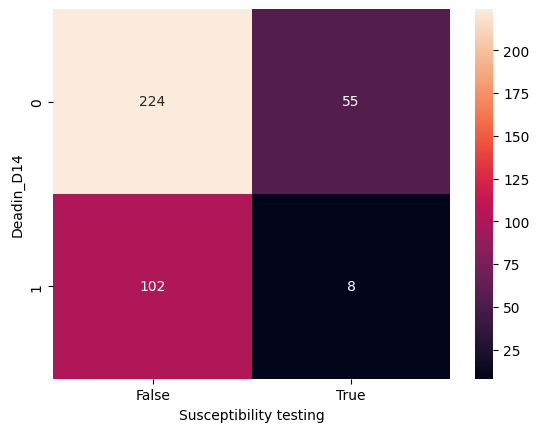

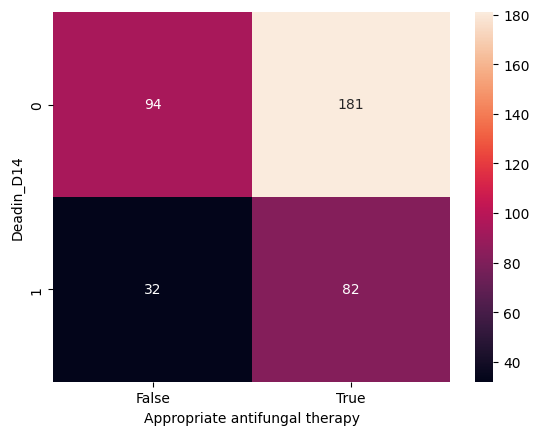

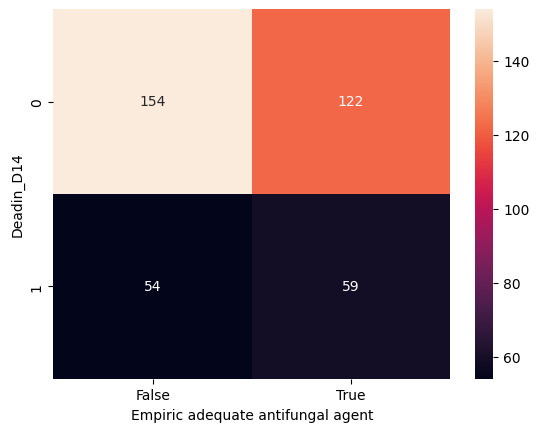

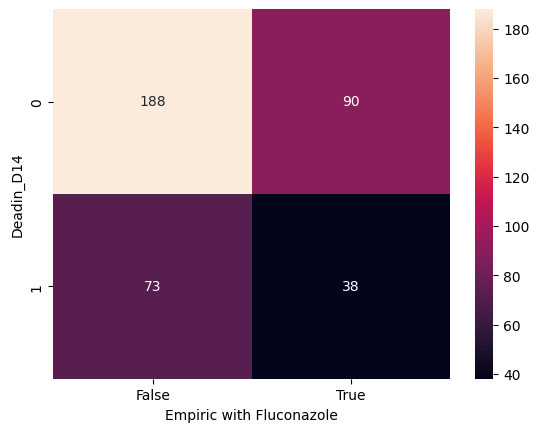

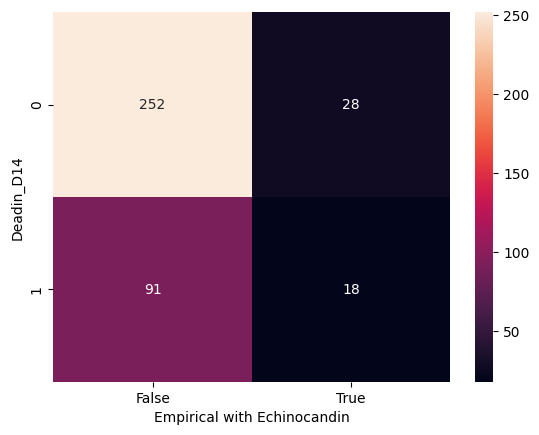

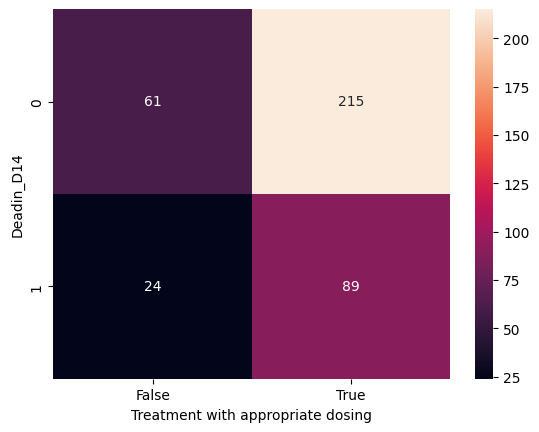

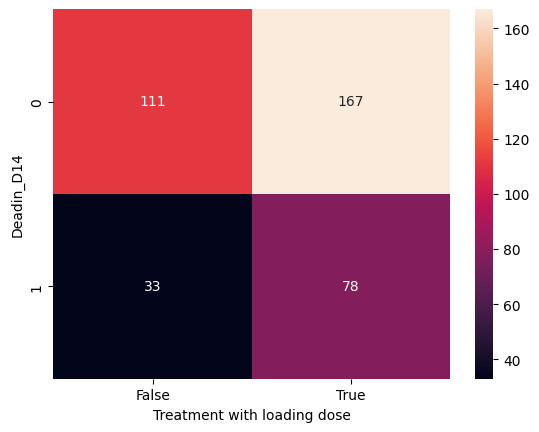

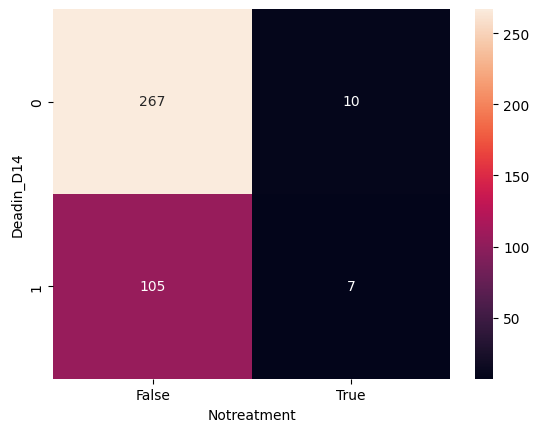

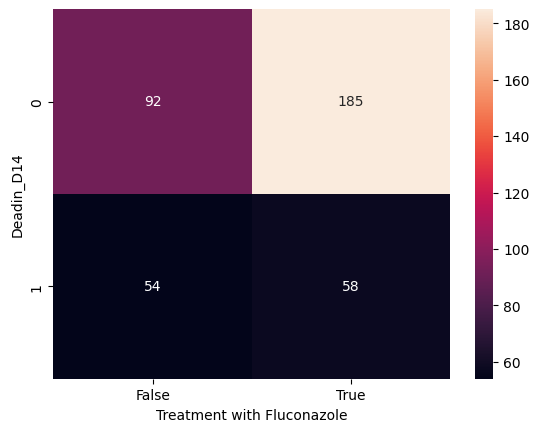

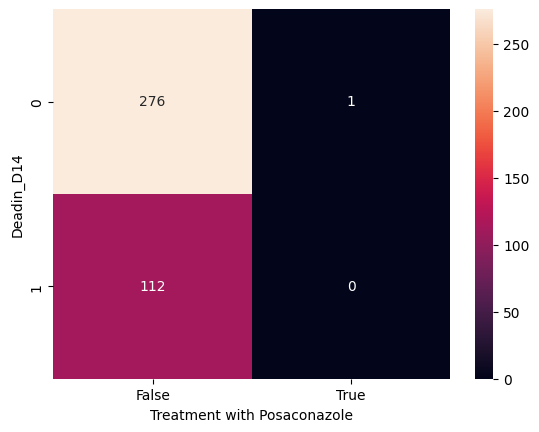

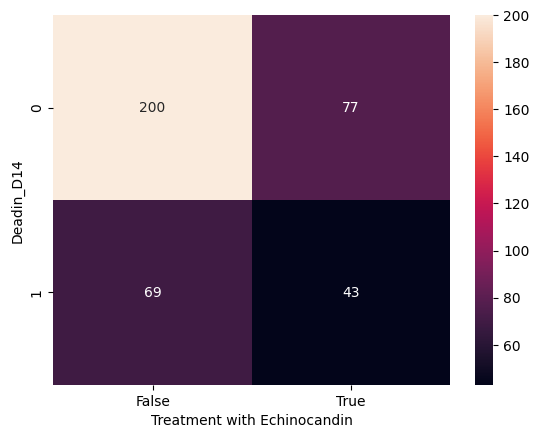

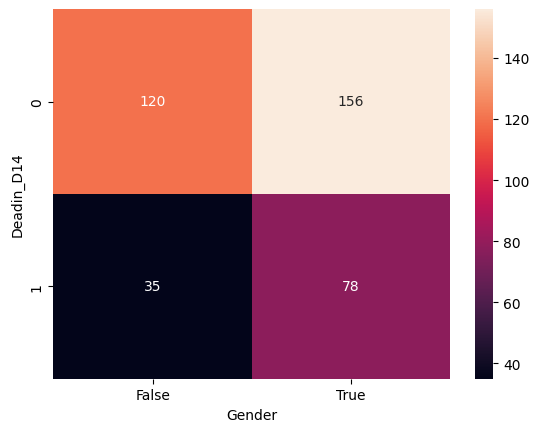

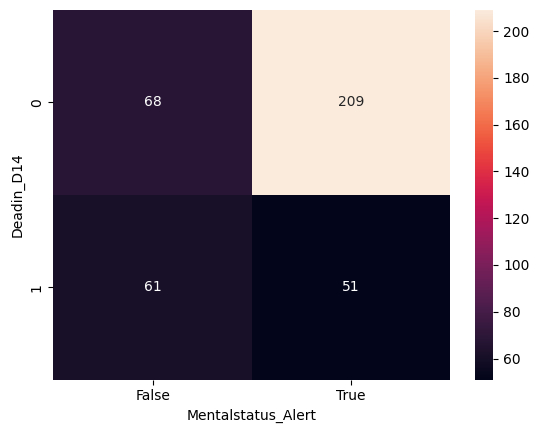

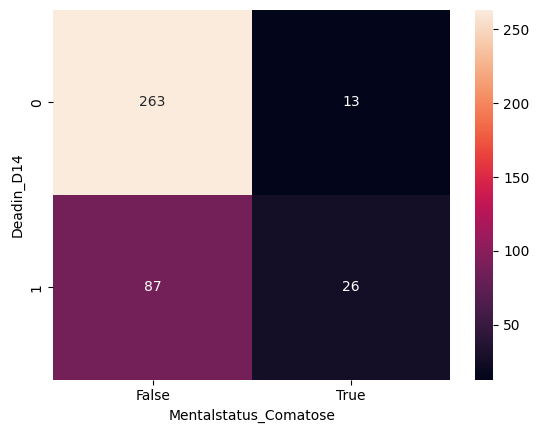

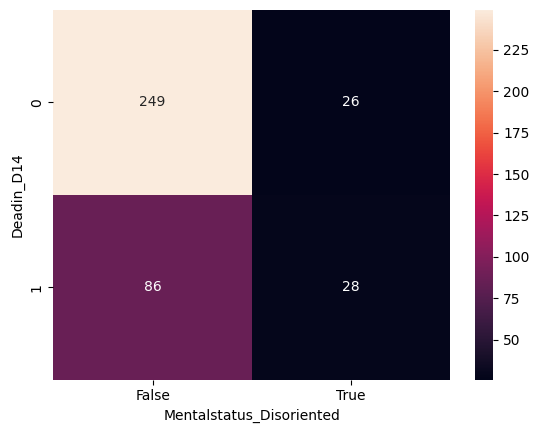

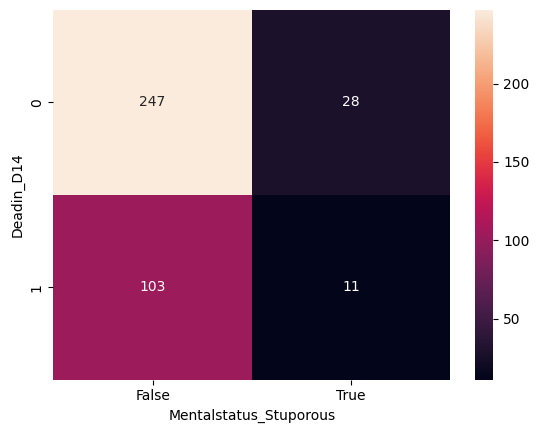

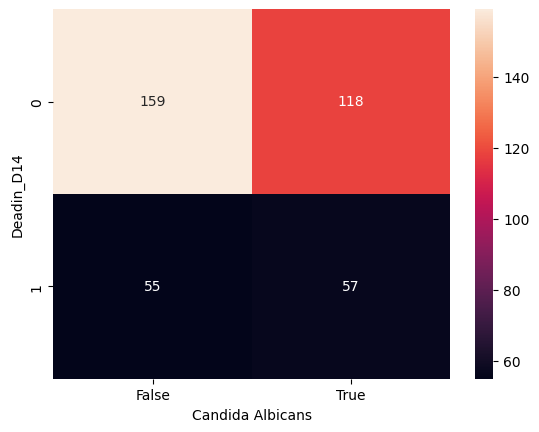

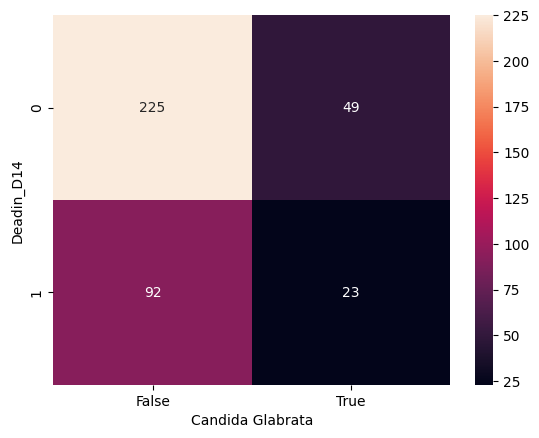

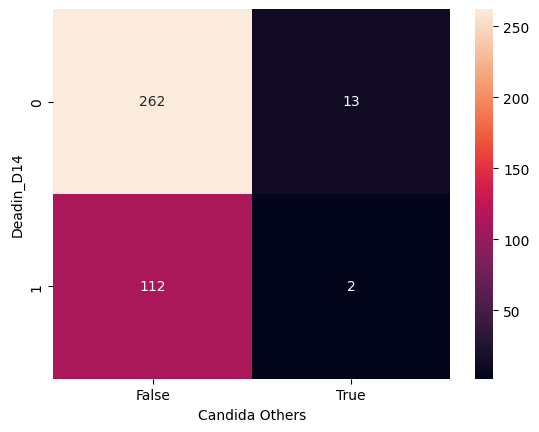

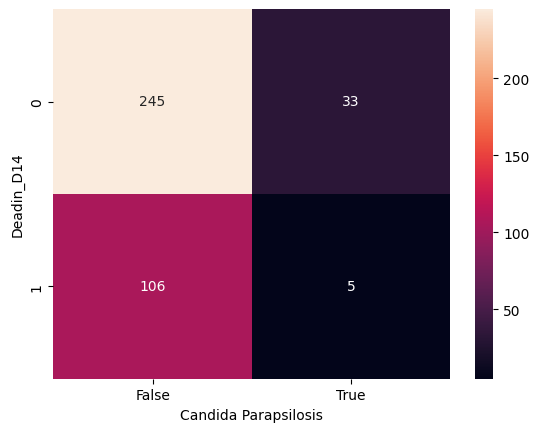

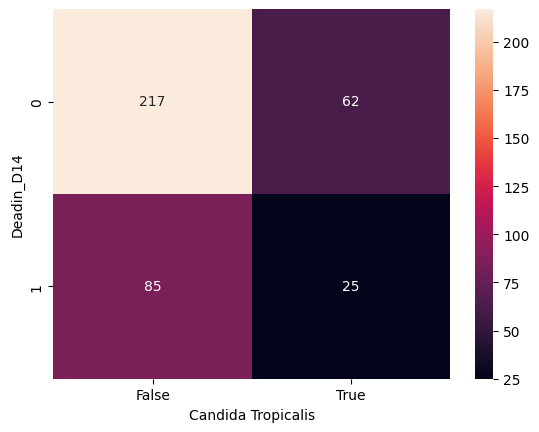

In [27]:
for col in quantitave:
  plt.figure()
  sns.heatmap(pd.crosstab(new_df['Deadin_D14'],new_df[col]),annot=True, fmt='d')

<Axes: >

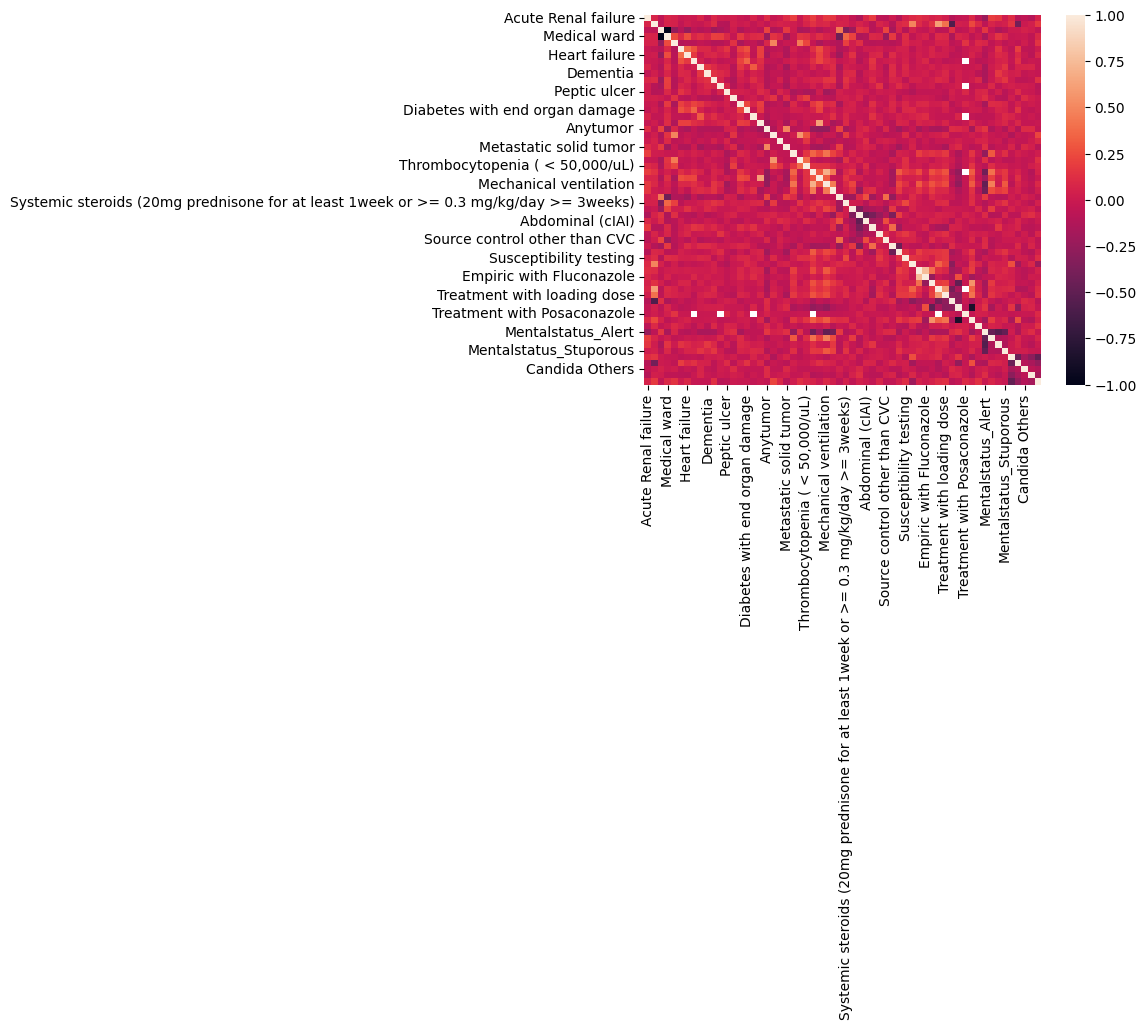

In [28]:
sns.heatmap(quantitave.corr())

#Preprocess

In [29]:
Df=df.copy()

In [30]:
Df.head()

Age  Days to receive antifungal therapy (treatment on index day=1)  \
0  82.0                                                1.0               
1  49.0                                                0.0               
2  44.0                                                1.0               
3  79.0                                                1.0               
4  51.0                                                NaN               

   Days after index(Follow on index day =1)  Temperature  Systolic pressure  \
0                                       2.0         36.9              137.0   
1                                       NaN         37.3              139.0   
2                                       4.0         39.3              121.0   
3                                       8.0         35.4               97.0   
4                                       2.0         36.8              148.0   

   Diastolic pressure  Heart rate  Respiratory rate     Na    K   Scr   Hct  \
0                74.0        59.0              18.0  142.0  3.9  1.41  31.8   
1               100.0        74.0              18.0  132.0  3.5  1.18  31.0   
2                 NaN       153.0              33.0  137.0  4.4  6.64  23.1   
3                82.0        69.0               5.0  144.0  4.2  1.44  27.8   
4                80.0       100.0              18.0  134.0  4.7  0.20  22.7   

     WBC  Glasgow Coma Score       FiO2  Platelet count(×10^3/uL)  \
0  10.75                14.0  20.000000                     244.0   
1   2.17                15.0  20.023407                      83.0   
2  18.94                 9.0  40.000000                     312.0   
3  32.48                 4.0  30.000000                      58.0   
4   1.86                15.0  24.693323                      62.0   

   Empirical duration Acute Renal failure  \
0                 0.0               False   
1                 0.0               False   
2                 1.0                True   
3                 2.0                True   
4                13.0               False   

  Treatment with appropriate selection Surgical ward Medical ward   Hema  \
0                                 True          True        False  False   
1                                False           NaN        False  False   
2                                 True         False         True  False   
3                                 True         False         True  False   
4                                False         False         True   True   

  Myocardial infarction Heart failure Peripheral vascular disease  \
0                 False         False                       False   
1                 False         False                       False   
2                 False         False                       False   
3                 False         False                       False   
4                 False          True                       False   

  Cerebrovascular disease Dementia Chronic pulmonary disease  \
0                   False    False                     False   
1                   False    False                     False   
2                   False    False                       NaN   
3                    True    False                      True   
4                     NaN    False                     False   

  Connective tissue disease Peptic ulcer Mild liver disease Diabetes  \
0                     False         True              False    False   
1                     False        False               True    False   
2                      True        False              False      NaN   
3                     False        False              False     True   
4                     False        False                NaN     True   

  Diabetes with end organ damage Hemiplegia Moderatetosevererenaldisease  \
0                          False      False                        False   
1                          False      False                        False   
2    

In [31]:
df_yc=df_y.copy()

In [32]:
Df=pd.concat([Df,df_y],axis=1)

## Encodage

In [33]:
Df

Age  Days to receive antifungal therapy (treatment on index day=1)  \
0    82.0                                                1.0               
1    49.0                                                0.0               
2    44.0                                                1.0               
3    79.0                                                1.0               
4    51.0                                                NaN               
..    ...                                                ...               
404  68.0                                                1.0               
405  73.0                                                1.0               
406  75.0                                                1.0               
407  46.0                                                1.0               
408   NaN                                                0.0               

     Days after index(Follow on index day =1)  Temperature  Systolic pressure  \
0                                    2.000000         36.9              137.0   
1                                         NaN         37.3              139.0   
2                                    4.000000         39.3              121.0   
3                                    8.000000         35.4               97.0   
4                                    2.000000         36.8              148.0   
..                                        ...          ...                ...   
404                                  2.000000         34.6              117.0   
405                                  9.000000         36.6              100.0   
406                                  3.000000         36.1              156.0   
407                                  1.000000         37.6              200.0   
408                                  4.367574         38.2               95.0   

     Diastolic pressure  Heart rate  Respiratory rate          Na         K  \
0                  74.0        59.0              18.0  142.000000  3.900000   
1                 100.0        74.0              18.0  132.000000  3.500000   
2                   NaN       153.0              33.0  137.000000  4.400000   
3                  82.0        69.0               5.0  144.000000  4.200000   
4                  80.0       100.0              18.0  134.000000  4.700000   
..                  ...         ...               ...         ...       ...   
404                56.0       104.0              30.0  133.000000  5.700000   
405                50.0        80.0              11.0         NaN  4.400000   
406                94.0        87.0              20.0  136.949812  3.798853   
407                79.0        69.0              23.0  147.000000  5.100000   
408                59.0        74.0              17.0  134.000000  3.700000   

      Scr   Hct    WBC  Glasgow Coma Score       FiO2  \
0    1.41  31.8  10.75                14.0  20.000000   
1    1.18  31.0   2.17                15.0  20.023407   
2    6.64  23.1  18.94                 9.0  40.000000   
3    1.44  27.8  32.48                 4.0  30.000000   
4    0.20  22.7   1.86                15.0  24.693323   
..    ...   ...    ...                 ...        ...   
404  2.26  19.5  11.67                 6.0  50.000000   
405  4.03  26.7  15.43                11.0  30.000000   
406  0.69  32.5   5.88                15.0  26.783452   
407  1.60  22.7   0.15                11.0  60.000000   
408  1.67  32.3   9.02                15.0  25.593308   

     Platelet count(×10^3/uL)  Empirical duration Acute Renal failure  \
0                       244.0                 0.0               False   
1                        83.0                 0.0               False   
2                       312.0                 1.0                True   
3                        58.0                 2.0                True   
4                        62.0                13.0               False   
..                        ...                 ..

In [34]:
trainset,testset=train_test_split(Df,test_size=0.15,random_state=10)

In [35]:
trainset['Deadin_D14'].value_counts()

Deadin_D14
0    247
1    100
Name: count, dtype: int64

In [36]:
testset['Deadin_D14'].value_counts()

Deadin_D14
0    44
1    18
Name: count, dtype: int64

In [37]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    column = np.where(column < lower_limit, lower_limit, column)
    column = np.where(column > upper_limit, upper_limit, column)
    return column

In [38]:
def imputation(df,col):
  numeric_columns = df.select_dtypes('float').columns
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

  for column in df[numeric_columns]:
    df[column] = cap_outliers(df[column])

  boolean_columns =col
  df[boolean_columns]=df[boolean_columns].applymap(lambda x:1 if x is True else (0 if x is False else x))
  for col in boolean_columns:
      mode_value = df[col].mode()[0]
      df[col].fillna(mode_value, inplace=True)

  return df

In [39]:
def preprocessing(df,col):
  df=imputation(df,col)

  X =df.drop('Deadin_D14',axis=1)
  y=df['Deadin_D14']

  return X ,y

##First try

In [40]:
X_train,y_train =preprocessing(trainset,cols_to_convert)

In [41]:
X_test,y_test =preprocessing(testset,cols_to_convert)

In [42]:
X_test

Age  Days to receive antifungal therapy (treatment on index day=1)  \
299  77.000000                                                1.0               
161  83.000000                                                1.0               
1    49.000000                                                1.0               
105  30.125000                                                1.0               
97   61.000000                                                1.0               
113  51.000000                                                1.0               
226  75.000000                                                1.0               
146  54.000000                                                1.0               
102  61.000000                                                1.0               
329  72.000000                                                1.0               
43   59.000000                                                1.0               
181  83.000000                                                1.0               
223  42.000000                                                1.0               
302  83.000000                                                1.0               
151  64.000000                                                1.0               
65   61.000000                                                1.0               
119  66.000000                                                1.0               
99   76.000000                                                1.0               
98   52.000000                                                1.0               
72   72.000000                                                1.0               
191  54.000000                                                1.0               
259  81.000000                                                1.0               
208  52.000000                                                1.0               
207  79.000000                                                1.0               
142  60.000000                                                1.0               
202  74.000000                                                1.0               
81   70.000000                                                1.0               
24   88.000000                                                1.0               
56   76.000000                                                1.0               
111  79.000000                                                1.0               
231  55.000000                                                1.0               
376  81.000000                                                1.0               
78   88.000000                                                1.0               
294  80.000000                                                1.0               
392  64.000000                                                1.0               
240  53.000000                                                1.0               
399  66.366667                                                1.0               
219  69.000000                                                1.0               
47   64.000000                                                1.0               
6    86.000000                                                1.0               
304  79.000000                                                1.0               
26   70.000000                                                1.0               
225  73.000000                                                1.0               
277  47.000000                                                1.0               
66   82.000000                                                1.0               
357  76.000000                                                1.0               
100  78.000000                                                1.0               
260  37.000000                                                1.0               
195  72.000000                            

In [43]:
X_test.dtypes

Age                                                                                     float64
Days to receive antifungal therapy (treatment on index day=1)                           float64
Days after index(Follow on index day =1)                                                float64
Temperature                                                                             float64
Systolic pressure                                                                       float64
Diastolic pressure                                                                      float64
Heart rate                                                                              float64
Respiratory rate                                                                        float64
Na                                                                                      float64
K                                                                                       float64
Scr                                     

##Modelisation

In [44]:
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

  N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))

  plt.figure(figsize=(12,8))
  plt.plot(N,train_score.mean(axis=1),label='train score')
  plt.plot(N,val_score.mean(axis=1),label='test score')
  plt.legend()


In [45]:
model_1=RandomForestClassifier(random_state=10)

[[44  0]
 [10  8]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        44
           1       1.00      0.44      0.62        18

    accuracy                           0.84        62
   macro avg       0.91      0.72      0.76        62
weighted avg       0.87      0.84      0.82        62



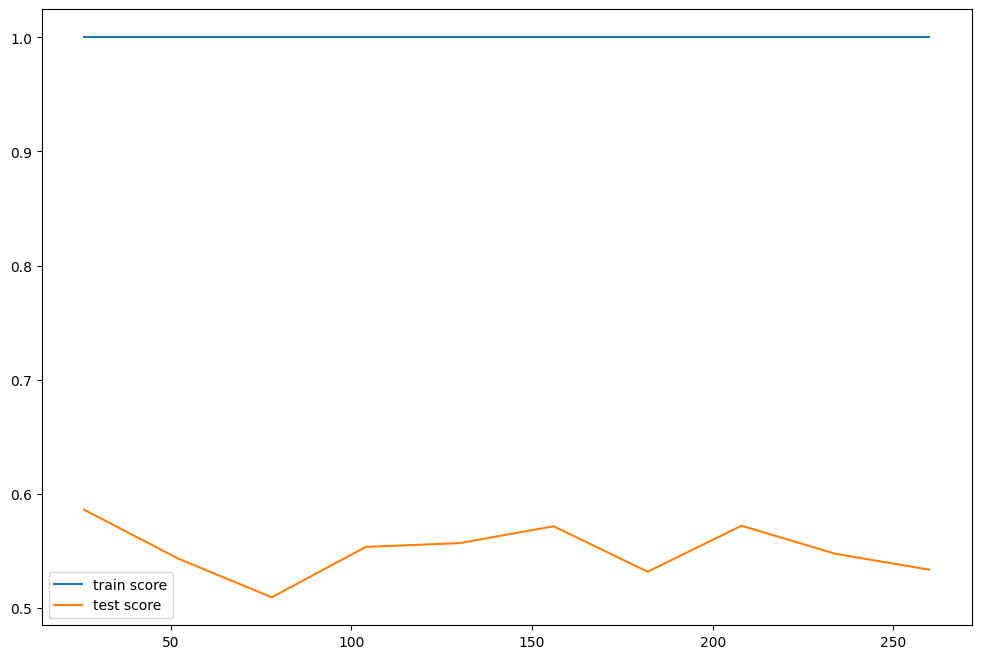

In [46]:
evaluation(model_1)

In [47]:
y_pred=model_1.predict(X_test)

In [48]:
f1_score(y_test, y_pred)

0.6153846153846153

In [49]:
auc_roc_score = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc_score)


AUC-ROC Score: 0.7222222222222222


<Axes: >

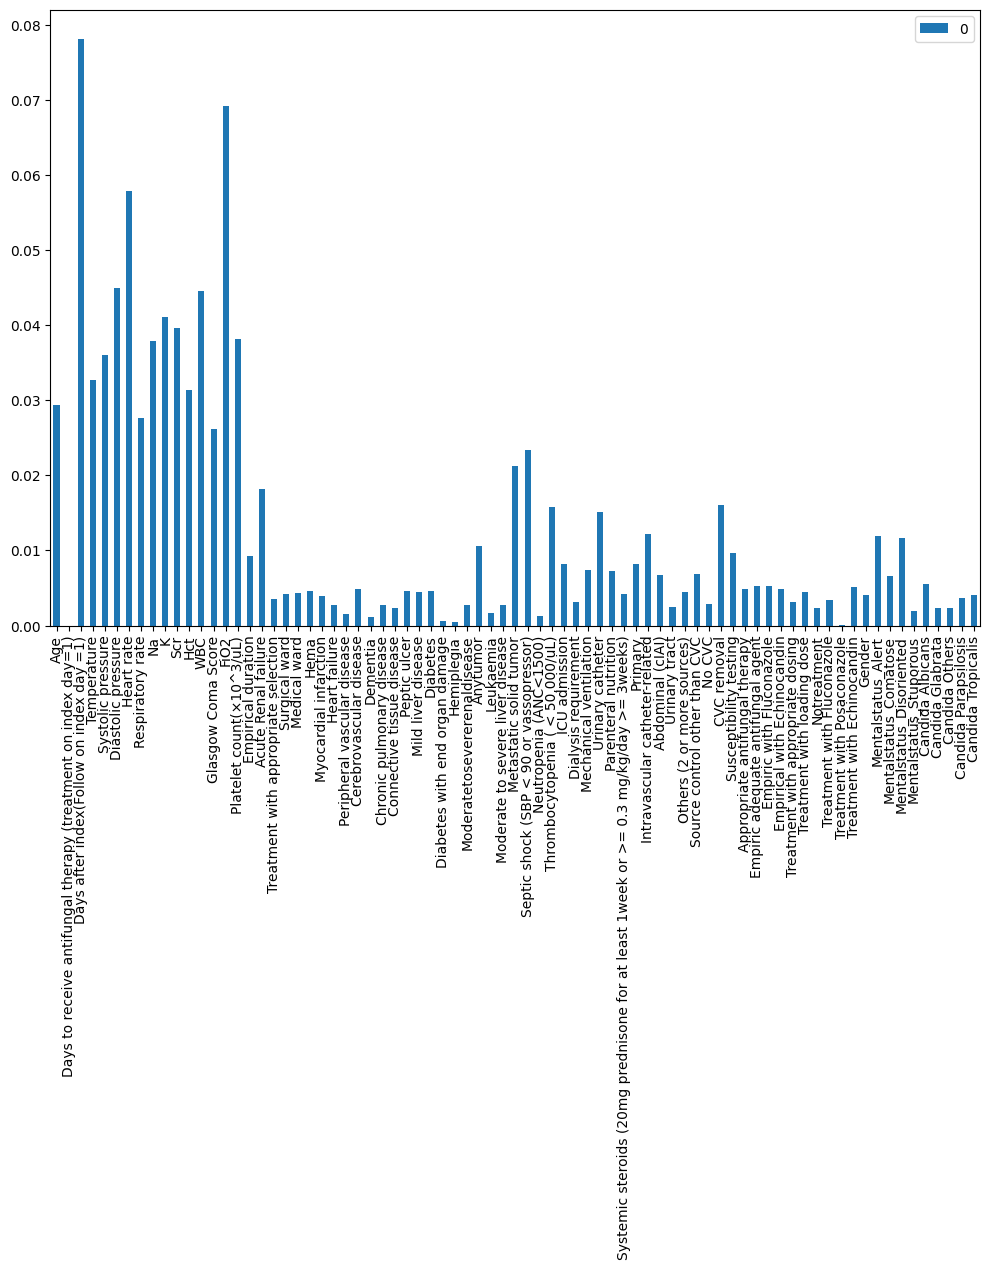

In [50]:
pd.DataFrame(model_1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

In [51]:
importances = pd.DataFrame(model_1.feature_importances_, index=X_train.columns, columns=['importance'])

# Filter columns where importance is greater than 0.01
important_features = importances[importances['importance'] > 0.01].index.tolist()

print("The columns with importance greater than 0.01 are :")
print(important_features)

The columns with importance greater than 0.01 are :
['Age', 'Days after index(Follow on index day =1)', 'Temperature', 'Systolic pressure', 'Diastolic pressure', 'Heart rate', 'Respiratory rate', 'Na', 'K', 'Scr', 'Hct', 'WBC', 'Glasgow Coma Score', 'FiO2', 'Platelet count(×10^3/uL)', 'Acute Renal failure', 'Anytumor', 'Metastatic solid tumor', 'Septic shock (SBP < 90 or vassopressor)', 'Thrombocytopenia ( < 50,000/uL)', 'Urinary catheter', 'Intravascular catheter-related', 'CVC removal', 'Mentalstatus_Alert', 'Mentalstatus_Disoriented']


##Amélioration

In [52]:
def preprocessing(df,col):
  df=imputation(df,col)

  X=df[important_features]
  y=df['Deadin_D14']

  return X ,y

In [53]:
X_train,y_train =preprocessing(trainset,cols_to_convert)

In [54]:
X_test,y_test =preprocessing(testset,cols_to_convert)

In [55]:
X_test

Age  Days after index(Follow on index day =1)  Temperature  \
299  77.000000                                  8.000000    35.800000   
161  83.000000                                  3.000000    36.669492   
1    49.000000                                  3.803960    37.300000   
105  30.125000                                  6.000000    38.000000   
97   61.000000                                  0.000000    37.600000   
113  51.000000                                  3.000000    34.700000   
226  75.000000                                  6.000000    36.800000   
146  54.000000                                  3.000000    36.500000   
102  61.000000                                  3.000000    35.000000   
329  72.000000                                  4.000000    37.100000   
43   59.000000                                  0.000000    38.300000   
181  83.000000                                  8.000000    37.000000   
223  42.000000                                  0.000000    35.300000   
302  83.000000                                  1.000000    37.500000   
151  64.000000                                  2.000000    36.400000   
65   61.000000                                  3.000000    37.000000   
119  66.000000                                  0.000000    36.000000   
99   76.000000                                  0.000000    34.400000   
98   52.000000                                  0.000000    39.250000   
72   72.000000                                  3.803960    34.050000   
191  54.000000                                  6.000000    37.300000   
259  81.000000                                 11.000000    36.000000   
208  52.000000                                  3.000000    36.100000   
207  79.000000                                  0.000000    36.300000   
142  60.000000                                  0.000000    37.000000   
202  74.000000                                  3.803960    36.800000   
81   70.000000                                  3.000000    35.800000   
24   88.000000                                  0.000000    36.800000   
56   76.000000                                  2.000000    36.900000   
111  79.000000                                  3.000000    35.900000   
231  55.000000                                  7.000000    36.700000   
376  81.000000                                  0.000000    36.200000   
78   88.000000                                  5.000000    36.669492   
294  80.000000                                  8.000000    36.800000   
392  64.000000                                  8.000000    38.100000   
240  53.000000                                  0.000000    37.100000   
399  66.366667                                  3.000000    37.000000   
219  69.000000                                  5.000000    37.000000   
47   64.000000                                  8.000000    37.400000   
6    86.000000                                  1.000000    34.100000   
304  79.000000                                  0.000000    36.300000   
26   70.000000                                  6.000000    37.300000   
225  73.000000                                  2.000000    36.700000   
277  47.000000                                  3.000000    36.669492   
66   82.000000                                  5.000000    37.800000   
357  76.000000                                  4.000000    39.200000   
100  78.000000                                  3.803960    36.500000   
260  37.000000                                  3.000000    37.100000   
195  72.000000                                  0.000000    39.250000   
101  59.000000                                  3.803960    37.600000   
121  63.000000                                  6.000000    38.200000   
407  46.000000                                  1.000000    37.600000   
37   50.000000                                 11.000000    35.300000   
395  77.000000                                  3.825703    35.300000

In [56]:
X_test.dtypes

Age                                         float64
Days after index(Follow on index day =1)    float64
Temperature                                 float64
Systolic pressure                           float64
Diastolic pressure                          float64
Heart rate                                  float64
Respiratory rate                            float64
Na                                          float64
K                                           float64
Scr                                         float64
Hct                                         float64
WBC                                         float64
Glasgow Coma Score                          float64
FiO2                                        float64
Platelet count(×10^3/uL)                    float64
Acute Renal failure                         float64
Anytumor                                    float64
Metastatic solid tumor                      float64
Septic shock (SBP < 90 or vassopressor)     float64
Thrombocytop

In [57]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif,k=8))

In [58]:
RandomForest=make_pipeline(preprocessor, RandomForestClassifier(random_state=10))
AdaBoost=make_pipeline(preprocessor, AdaBoostClassifier(random_state=10))
SVM=make_pipeline(preprocessor,StandardScaler(), SVC(random_state=10))
KNN=make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [59]:
dict_of_models ={'RandomForest':RandomForest,
                 'AdaBoost':AdaBoost,
                 'SVM':SVM,
                 'KNN':KNN}

RandomForest


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[41  3]
 [12  6]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.67      0.33      0.44        18

    accuracy                           0.76        62
   macro avg       0.72      0.63      0.64        62
weighted avg       0.74      0.76      0.73        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

AdaBoost
[[37  7]
 [10  8]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.53      0.44      0.48        18

    accuracy                           0.73        62
   macro avg       0.66      0.64      0.65        62
weighted avg       0.71      0.73      0.72        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

SVM
[[41  3]
 [12  6]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.67      0.33      0.44        18

    accuracy                           0.76        62
   macro avg       0.72      0.63      0.64        62
weighted avg       0.74      0.76      0.73        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

KNN
[[41  3]
 [11  7]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        44
           1       0.70      0.39      0.50        18

    accuracy                           0.77        62
   macro avg       0.74      0.66      0.68        62
weighted avg       0.76      0.77      0.75        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

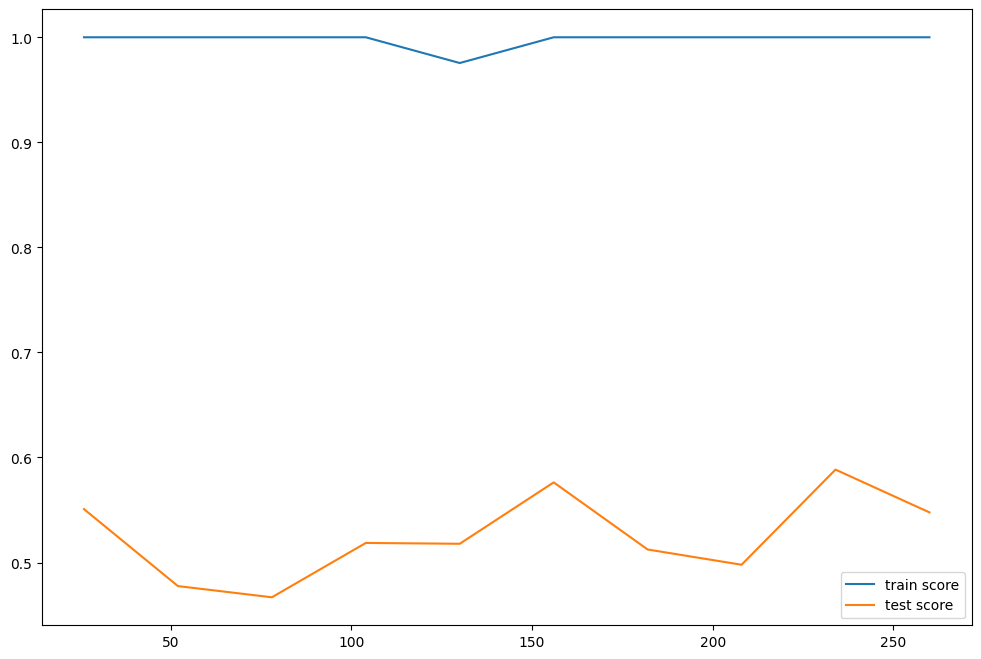

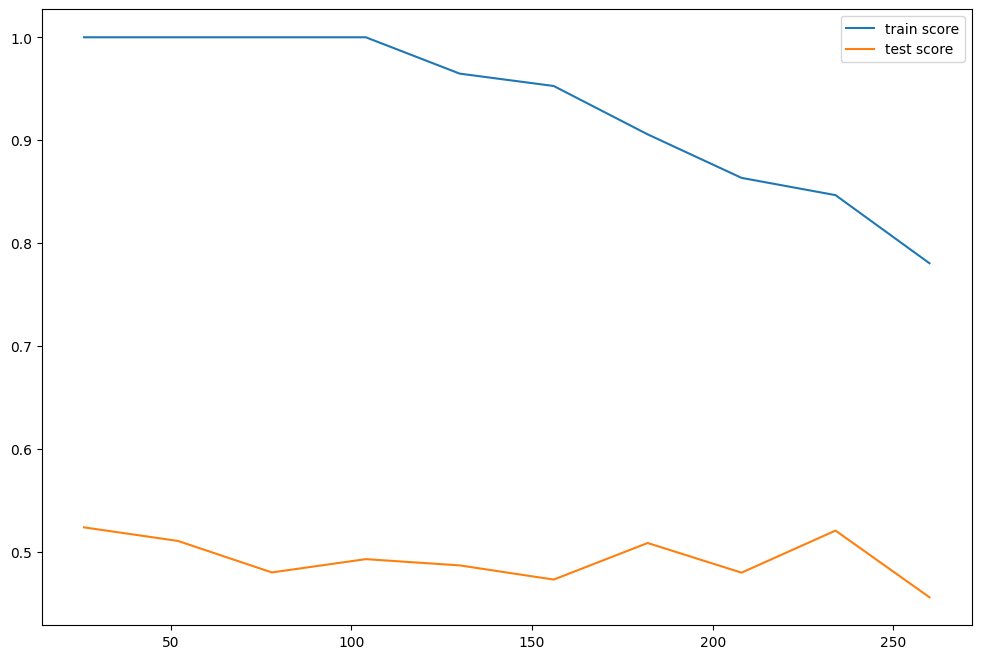

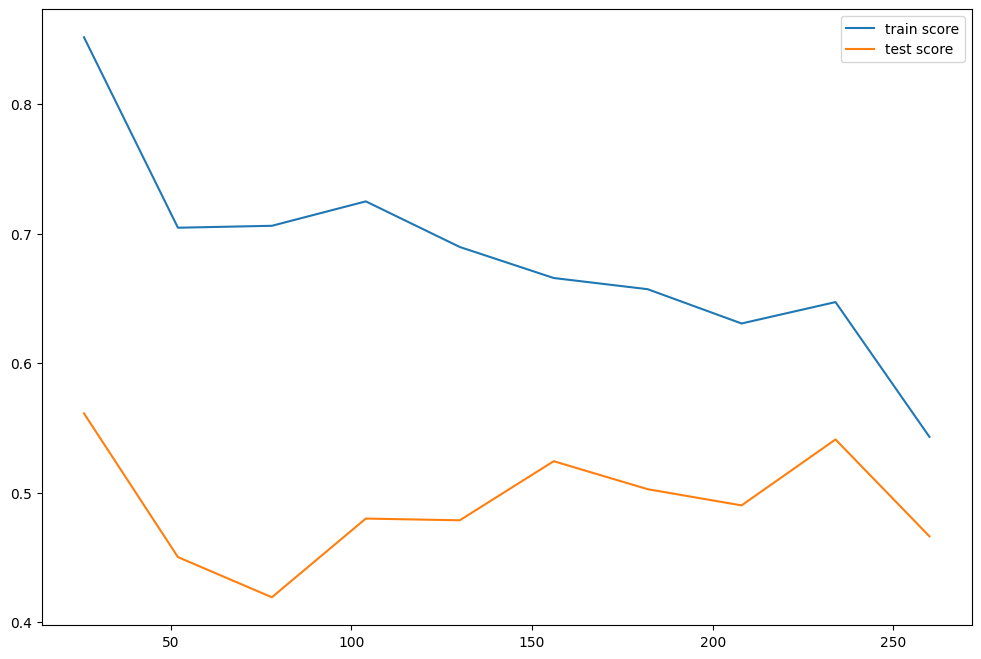

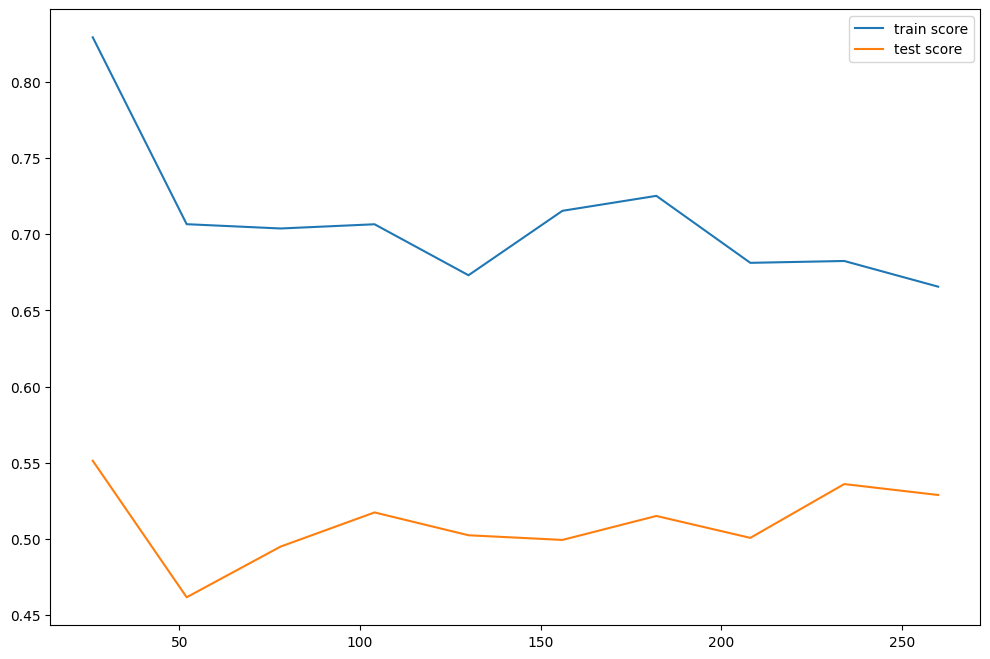

In [60]:
for name,model in dict_of_models.items():
  print(name)
  evaluation(model)

#Optimisation

## SVM

In [61]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=10))])

In [62]:
hyper_params={'svc__gamma':[1e-5,1e-6],
                'svc__C':[1250, 1500,1750],
              'svc__probability':[True],
               'pipeline__polynomialfeatures__degree':[2],
               'pipeline__selectkbest__k': range(35, 45)}

In [63]:
grid1=RandomizedSearchCV(SVM,hyper_params,scoring='f1',cv=4,n_iter=80)
grid1.fit(X_train,y_train)
print(grid1.best_params_)
y_pred1=grid1.predict(X_test)
print(classification_report(y_test,y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=80. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_select

{'svc__probability': True, 'svc__gamma': 1e-05, 'svc__C': 1500, 'pipeline__selectkbest__k': 43, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        44
           1       0.82      0.50      0.62        18

    accuracy                           0.82        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.82      0.82      0.81        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[42  2]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        44
           1       0.82      0.50      0.62        18

    accuracy                           0.82        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.82      0.82      0.81        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

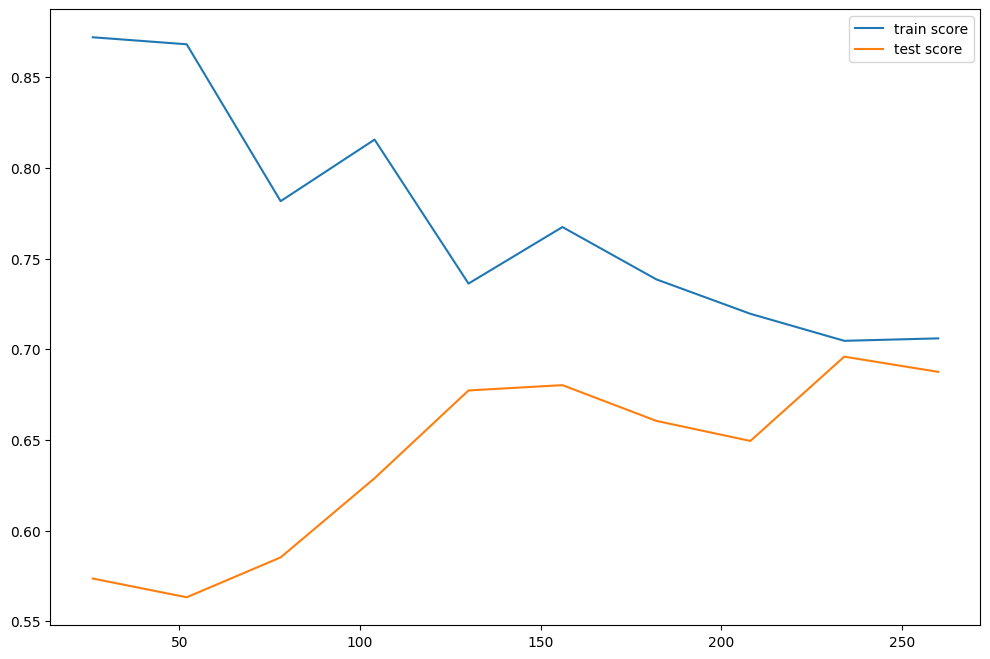

In [64]:
evaluation(grid1.best_estimator_)

In [65]:
precision, recall, threshold = precision_recall_curve(y_test, grid1.best_estimator_.decision_function(X_test))

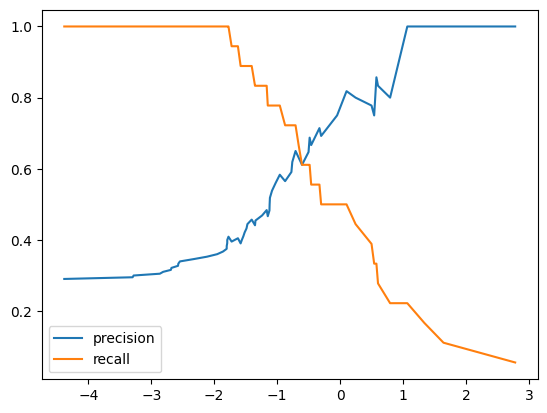

In [66]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [67]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [68]:
y_pred1 = model_final(grid1.best_estimator_, X_test, threshold=-0.75)

In [69]:
f1_score(y_test, y_pred1)

0.6842105263157895

In [70]:
recall_score(y_test, y_pred1)

0.7222222222222222

In [71]:
auc_roc_score1 = roc_auc_score(y_test, y_pred1)
print("AUC-ROC Score:", auc_roc_score1)

AUC-ROC Score: 0.7815656565656566


#random forest

In [72]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=10))])

In [73]:
# Define the parameter grid
param_grid = {
    'randomforestclassifier__max_depth': [ 45, 50,55],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__n_estimators': [200,230,250],
    'pipeline__polynomialfeatures__degree':[3,4],
    'pipeline__selectkbest__k': range(55, 70)
}

grid2=RandomizedSearchCV(RandomForest,param_grid,scoring='f1',cv=4,n_iter=100)
grid2.fit(X_train,y_train)
print(grid2.best_params_)
y_pred2=grid2.predict(X_test)
print(classification_report(y_test,y_pred2))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   15    17    18 ... 23747 23748 23749] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   15    17    18 ... 23747 23748 23749] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   15    17    18 ... 23747 23748 23749] 

{'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 50, 'pipeline__selectkbest__k': 65, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.80      0.44      0.57        18

    accuracy                           0.81        62
   macro avg       0.80      0.70      0.72        62
weighted avg       0.81      0.81      0.79        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  15   17   18 ... 3272 3273 3274] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[42  2]
 [10  8]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.80      0.44      0.57        18

    accuracy                           0.81        62
   macro avg       0.80      0.70      0.72        62
weighted avg       0.81      0.81      0.79        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  15   17   18 ... 3272 3273 3274] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  15   17   18 ... 3272 3273 3274] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,

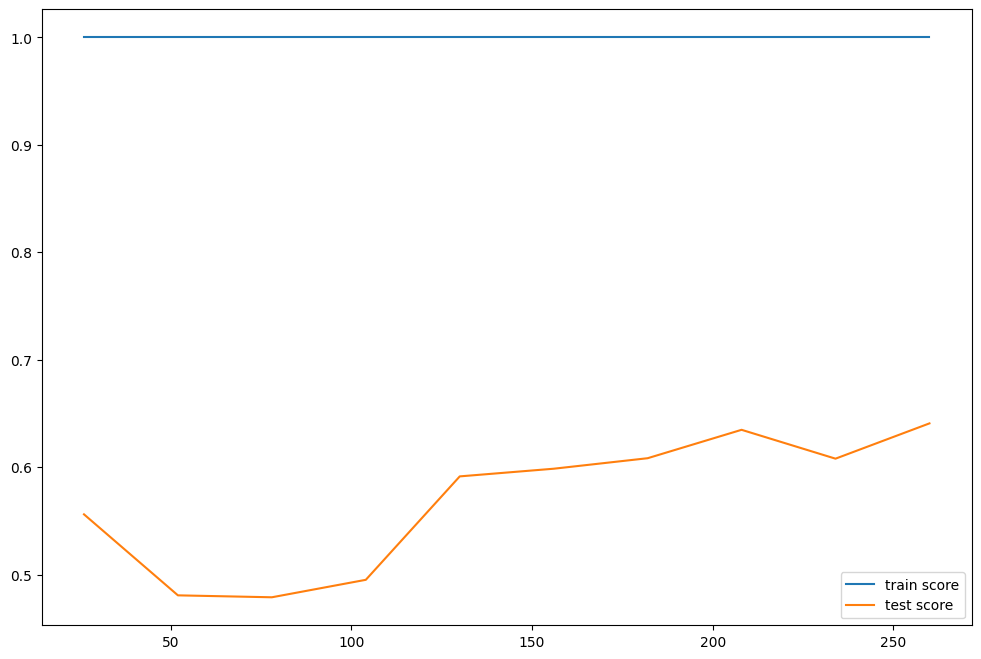

In [74]:
evaluation(grid2.best_estimator_)

In [75]:
y_pred2 = grid2.best_estimator_.predict(X_test)

In [76]:
f1_score(y_test, y_pred2)

0.5714285714285714

In [77]:
recall_score(y_test, y_pred2)

0.4444444444444444

In [78]:
auc_roc_score2 = roc_auc_score(y_test, y_pred2)
print("AUC-ROC Score:", auc_roc_score2)

AUC-ROC Score: 0.6994949494949495


## adaboost

In [79]:
AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=10))])

In [80]:
param_grid1= {
    'adaboostclassifier__n_estimators': [210,220,230],
    'adaboostclassifier__learning_rate': [0.05, 0.1, 0.15],
    'pipeline__polynomialfeatures__degree':[2],
    'pipeline__selectkbest__k': range(60, 70)
}

grid3=RandomizedSearchCV(AdaBoost,param_grid1,scoring='f1',cv=4,n_iter=80)
grid3.fit(X_train,y_train)
print(grid3.best_params_)
y_pred3=grid3.predict(X_test)
print(classification_report(y_test,y_pred3))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

{'pipeline__selectkbest__k': 60, 'pipeline__polynomialfeatures__degree': 2, 'adaboostclassifier__n_estimators': 210, 'adaboostclassifier__learning_rate': 0.05}
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.75      0.50      0.60        18

    accuracy                           0.81        62
   macro avg       0.78      0.72      0.74        62
weighted avg       0.80      0.81      0.79        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[41  3]
 [ 9  9]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.75      0.50      0.60        18

    accuracy                           0.81        62
   macro avg       0.78      0.72      0.74        62
weighted avg       0.80      0.81      0.79        62



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19  24  40  42  43  44  49  64  66  67  68  73  87  89  90
  91  96 109 111 112 113 118 130 132 133 134 139 150 152 153 154 159 169
 171 172 173 178 187 189 190 191 196 204 206 207 208 213 220 222 223 224
 229 235 237 238 239 244 249 251 252 253 258 262 264 265 266 271 274 276
 277 278 283 285 287 288 289 294 295 296 297 298 299 300 301 302 303 304
 306 307 308 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 339 343 346 348 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 15  17  18  19

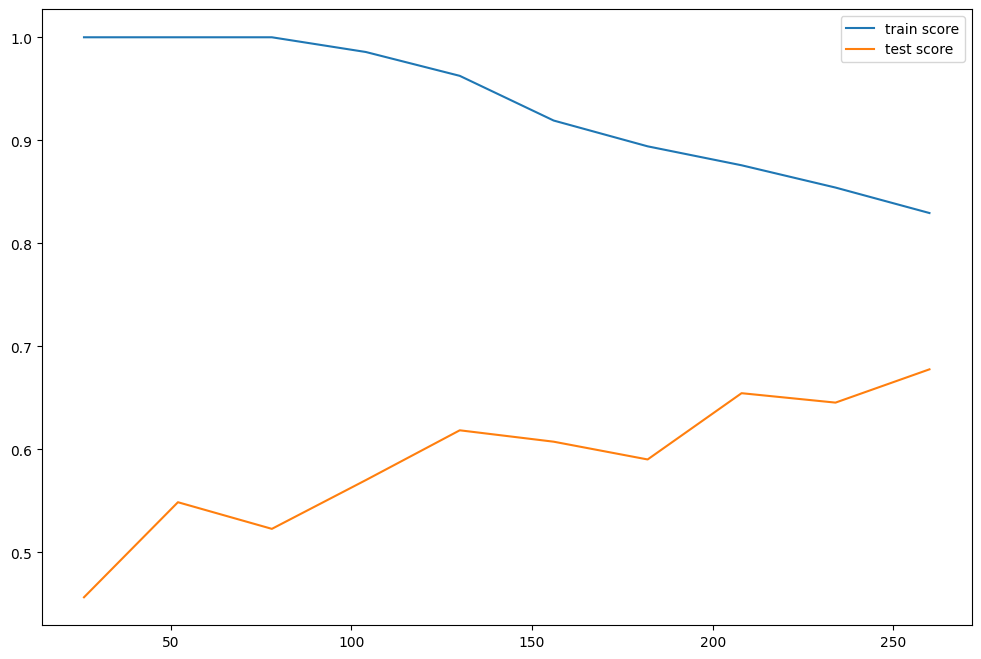

In [81]:
evaluation(grid3.best_estimator_)

In [82]:
precision, recall, threshold = precision_recall_curve(y_test, grid3.best_estimator_.decision_function(X_test))

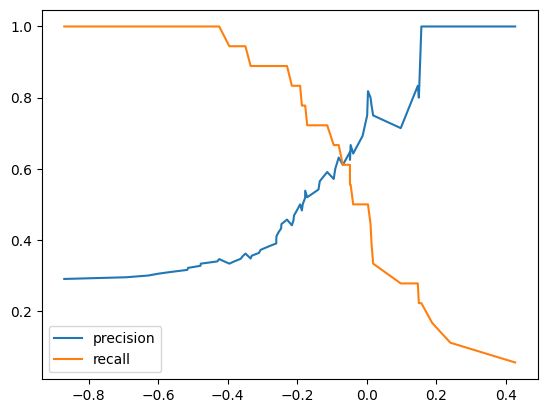

In [83]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [84]:
y_pred3 = model_final(grid3.best_estimator_, X_test, threshold=-0.12)

In [85]:
f1_score(y_test, y_pred3)

0.65

In [86]:
recall_score(y_test, y_pred3)

0.7222222222222222

In [87]:
auc_roc_score3 = roc_auc_score(y_test, y_pred3)
print("AUC-ROC Score:", auc_roc_score3)

AUC-ROC Score: 0.7588383838383839


# Prediction

In [88]:
test_set=pd.read_excel('/content/test_X.xlsx',index_col=0)

In [89]:
def preprocessing_test(df,col):
  df=imputation(df,col)

  X=df[important_features]

  return X

In [90]:
test =preprocessing_test(test_set,cols_to_convert)

In [91]:
y_test=grid1.predict(test)

In [94]:
y_test.shape

(103,)

In [97]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
y_test_proba = grid1.predict_proba(test)

In [100]:
y_test_proba_death=y_test_proba[:,1]

In [102]:
df = pd.DataFrame({
    'ID': range(1, len(y_test) + 1),
    'prediction': y_test,
    'probability': y_test_proba[:,1]
})

df.to_csv('predictions_probabilites.csv', index=False)
